# Cerebellar volumetry and cortical thickness covariance 
## Data: 
    - 1. Freesurfer cortical thickness measures in Des/DKT atlas;
    - 2. Cerebellar lobular volumnes from SUIT/MDTB/MAGeT softwares; 
## Atlases
    -1. Des 2009a: L+R: 74 regions + WhiteSurfArea_area + MeanThickness_thickness
    -2. DKT:       L+R: 31 regions + WhiteSurfArea_area + MeanThickness_thickness
## Cohorts
- The augmented cohort 211: MNI ET/ matched NC (34/177).

## Structrual cov construction
- 1. Remove the effect of age/sex/eTIV with residual method;
- 2. calculate the correlation matrix;
- 3. z-transform based on control mean and standard deviation for comparison with FDR correction at significance level of 0.05.

## Tasks: exploring the structural covariance with cerebellar/lolbular volumes 
- 1. Structrial differences between ET and NC 
- 2. ROIs of cerebellum:
- 3. SUIT/MAGeT cerebellar volume VS left, right hemisphere... 
- 4. Discuss with Nikhil about the construction of structrual covariance. 
## recommendations from literature
    - use cortical volumne/surface areas
Ref: 
1. [Reliability and comparability of human brain structural covariance networks](https://www.sciencedirect.com/science/article/pii/S1053811920305905?via%3Dihub)
2. [Freesurfer cortical thickness calculation](https://surfer.nmr.mgh.harvard.edu/fswiki/VolumeRoiCorticalThickness)
3. 

In [1]:
#reading/merging/selecting data
from pathlib import Path
import nipype.interfaces.io as nio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

codes_dir =  Path("/codes")
data_dir = codes_dir / "tab_data"
fig_dir  = codes_dir / "stats" / "figs"
sys.path.append(str(codes_dir))

# data files
matched_des_all_file = data_dir/ 'matched_Des-all_qced.csv'
matched_DKT_all_file = data_dir/ 'matched_DKT-all_qced.csv'
data_df = pd.read_csv(matched_DKT_all_file , sep=',', header=0, index_col=0);

In [2]:
# preproc ROI list for analysis
# cerebellum ROIs
SUIT_l_labels_ = ['Left_I_IV',  'Left_V', 'Left_VI', 'Left_CrusI', 'Left_CrusII', 
                 'Left_VIIb', 'Left_VIIIa', 'Left_VIIIb', 'Left_IX', 'Left_X', 
                 'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'];
SUIT_r_labels_ = ['Right_I_IV','Right_V','Right_VI','Right_CrusI','Right_CrusII',
                 'Right_VIIb','Right_VIIIa','Right_VIIIb','Right_IX','Right_X',
                 'Right_Dentate','Right_Interposed','Right_Fastigial'];
SUIT_v_labels = ['Vermis_VI', 'Vermis_CrusI', 'Vermis_CrusII', 'Vermis_VIIb', 
                 'Vermis_VIIIa','Vermis_VIIIb', 'Vermis_IX', 'Vermis_X'];
MAGeT_l_labels = ['L_I_IV',  'L_V', 'L_VI', 'L_Crus_I', 'L_Crus_II', 
                 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X'];  # NO  'Left_Dentate', 'Left_Interposed', 'Left_Fastigial'
MAGeT_r_labels = ['R_I_IV','R_V','R_VI','R_Crus_I','R_Crus_II',
                 'R_VIIB','R_VIIIA','R_VIIIB','R_IX','R_X'];  # NO  'Right_Dentate','Right_Interposed','Right_Fastigial'
length_lobule_list=len(MAGeT_l_labels)
SUIT_l_labels = SUIT_l_labels_[:length_lobule_list];
SUIT_r_labels = SUIT_r_labels_[:length_lobule_list];
cerebellum_list = ['Left_Cerebellum_White_Matter','Left_Cerebellum_Cortex','Right_Cerebellum_White_Matter','Right_Cerebellum_Cortex'];

# Freesurfer 'Destrieux' 2009a atlas, and DKT atlas ROIs:
Des_atlas_str="lh_G&S_frontomargin_thickness	lh_G&S_occipital_inf_thickness	lh_G&S_paracentral_thickness	lh_G&S_subcentral_thickness	lh_G&S_transv_frontopol_thickness	lh_G&S_cingul-Ant_thickness	lh_G&S_cingul-Mid-Ant_thickness	lh_G&S_cingul-Mid-Post_thickness	lh_G_cingul-Post-dorsal_thickness	lh_G_cingul-Post-ventral_thickness	lh_G_cuneus_thickness	lh_G_front_inf-Opercular_thickness	lh_G_front_inf-Orbital_thickness	lh_G_front_inf-Triangul_thickness	lh_G_front_middle_thickness	lh_G_front_sup_thickness	lh_G_Ins_lg&S_cent_ins_thickness	lh_G_insular_short_thickness	lh_G_occipital_middle_thickness	lh_G_occipital_sup_thickness	lh_G_oc-temp_lat-fusifor_thickness	lh_G_oc-temp_med-Lingual_thickness	lh_G_oc-temp_med-Parahip_thickness	lh_G_orbital_thickness	lh_G_pariet_inf-Angular_thickness	lh_G_pariet_inf-Supramar_thickness	lh_G_parietal_sup_thickness	lh_G_postcentral_thickness	lh_G_precentral_thickness	lh_G_precuneus_thickness	lh_G_rectus_thickness	lh_G_subcallosal_thickness	lh_G_temp_sup-G_T_transv_thickness	lh_G_temp_sup-Lateral_thickness	lh_G_temp_sup-Plan_polar_thickness	lh_G_temp_sup-Plan_tempo_thickness	lh_G_temporal_inf_thickness	lh_G_temporal_middle_thickness	lh_Lat_Fis-ant-Horizont_thickness	lh_Lat_Fis-ant-Vertical_thickness	lh_Lat_Fis-post_thickness	lh_Pole_occipital_thickness	lh_Pole_temporal_thickness	lh_S_calcarine_thickness	lh_S_central_thickness	lh_S_cingul-Marginalis_thickness	lh_S_circular_insula_ant_thickness	lh_S_circular_insula_inf_thickness	lh_S_circular_insula_sup_thickness	lh_S_collat_transv_ant_thickness	lh_S_collat_transv_post_thickness	lh_S_front_inf_thickness	lh_S_front_middle_thickness	lh_S_front_sup_thickness	lh_S_interm_prim-Jensen_thickness	lh_S_intrapariet&P_trans_thickness	lh_S_oc_middle&Lunatus_thickness	lh_S_oc_sup&transversal_thickness	lh_S_occipital_ant_thickness	lh_S_oc-temp_lat_thickness	lh_S_oc-temp_med&Lingual_thickness	lh_S_orbital_lateral_thickness	lh_S_orbital_med-olfact_thickness	lh_S_orbital-H_Shaped_thickness	lh_S_parieto_occipital_thickness	lh_S_pericallosal_thickness	lh_S_postcentral_thickness	lh_S_precentral-inf-part_thickness	lh_S_precentral-sup-part_thickness	lh_S_suborbital_thickness	lh_S_subparietal_thickness	lh_S_temporal_inf_thickness	lh_S_temporal_sup_thickness	lh_S_temporal_transverse_thickness"
DKT_atlas_str="lh_caudalanteriorcingulate_thickness	lh_caudalmiddlefrontal_thickness	lh_cuneus_thickness	lh_entorhinal_thickness	lh_fusiform_thickness	lh_inferiorparietal_thickness	lh_inferiortemporal_thickness	lh_isthmuscingulate_thickness	lh_lateraloccipital_thickness	lh_lateralorbitofrontal_thickness	lh_lingual_thickness	lh_medialorbitofrontal_thickness	lh_middletemporal_thickness	lh_parahippocampal_thickness	lh_paracentral_thickness	lh_parsopercularis_thickness	lh_parsorbitalis_thickness	lh_parstriangularis_thickness	lh_pericalcarine_thickness	lh_postcentral_thickness	lh_posteriorcingulate_thickness	lh_precentral_thickness	lh_precuneus_thickness	lh_rostralanteriorcingulate_thickness	lh_rostralmiddlefrontal_thickness	lh_superiorfrontal_thickness	lh_superiorparietal_thickness	lh_superiortemporal_thickness	lh_supramarginal_thickness	lh_transversetemporal_thickness	lh_insula_thickness"
Des_roi_list=[x.replace('-','_')[3:-10] for x in Des_atlas_str.split('\t')]
DKT_roi_list=[x.replace('-','_')[3:-10] for x in DKT_atlas_str.split('\t')]

# additional regions in cortical thickness and cortical areas
#+['lh_MeanThickness_thickness'];  
#+['rh_MeanThickness_thickness'];  
#+['lh_WhiteSurfArea_area']; 
#+['rh_WhiteSurfArea_area'];

def creat_Atlas_list(roi_list):
    lh_list = ['lh_'+x for x in roi_list];
    rh_list = ['rh_'+x for x in roi_list];
    # cortical thickness
    lh_cth_list = [x+'_thickness' for x in lh_list]+['lh_MeanThickness_thickness'];  
    rh_cth_list = [x+'_thickness' for x in rh_list]+['rh_MeanThickness_thickness'];  
    #
    lh_Vol_list = [x+'_volume' for x in lh_list];  
    rh_Vol_list = [x+'_volume' for x in rh_list];
    # 
    lh_area_list = [x+'_area' for x in lh_list]+['lh_WhiteSurfArea_area']; 
    rh_area_list = [x+'_area' for x in rh_list]+['rh_WhiteSurfArea_area'];
    # _meancurv
    lh_curv_list = [x+'_meancurv' for x in lh_list]; 
    rh_curv_list = [x+'_meancurv' for x in rh_list];
    res = {"l_cth":lh_cth_list,   "r_cth":rh_cth_list,
           "l_vol":lh_Vol_list,   "r_vol":rh_Vol_list,
           "l_area":lh_area_list, "r_area":rh_area_list,
           "l_curv":lh_curv_list, "r_curv":rh_curv_list,
           "l_list":lh_list,      "r_list":rh_list} 
    return res
Des_list_dict=creat_Atlas_list(Des_roi_list)
DKT_list_dict=creat_Atlas_list(DKT_roi_list)

In [3]:
# Preparing data:
from utils_.utils import ctr_tiv, glm_test, rep_model, ctr_by_nc, cal_es, creat_Bonf_df

cerebellar_tar_suit_list  = cerebellum_list+SUIT_l_labels +SUIT_r_labels;
cerebellar_tar_maget_list = cerebellum_list+MAGeT_l_labels+MAGeT_r_labels;

tar_list=[];

def data_prep(df, etiv_, cort_measure, cere_measure, confound_ctr, alpha_):
    res_dict={}
    for cortical_m_ in cort_measure:
        res_dict[cortical_m_]={};
        tar_list = cere_measure+DKT_list_dict['l_'+cortical_m_] + DKT_list_dict['r_'+cortical_m_];
        if confound_ctr==1:
            print('\tcontrolling confounding effect...')
            info_list= ['group', etiv_];
            cov_list = ['age','male', 'is_mni','is_ppmi','is_adni']
            vis_df_   = df.loc[:, info_list+cov_list+tar_list].copy()
            offset_str=-len(etiv_+"_"+"_".join(cov_list))-1;
            res_df, res_new_col_1 = ctr_tiv(vis_df_, tar_list, etiv_, cov_list, 'rm_norm')
            #res_dict[cortical_m_]={};
            res_dict[cortical_m_]['res']=res_df; 
            res_dict[cortical_m_]['new_list']=res_new_col_1;
            res_new_col  = [x[:offset_str] for x in res_new_col_1]
            et_tmp = res_df[res_df['group']=='ET'].copy(); et_tmp=et_tmp.drop(columns=res_new_col);#et_tmp.loc[:]
            nc_tmp = res_df[res_df['group']=='NC'].copy(); nc_tmp=nc_tmp.drop(columns=res_new_col);
            et_tmp_ = et_tmp.loc[:,res_new_col_1].copy(); et_tmp_.columns=res_new_col;
            nc_tmp_ = nc_tmp.loc[:,res_new_col_1].copy(); nc_tmp_.columns=res_new_col;
            #display(et_tmp_)
            #display(nc_tmp_)
            res_dict[cortical_m_]['ET']=et_tmp_;
            res_dict[cortical_m_]['NC']=nc_tmp_; 
        else:
            print('\tdata selection...')
            vis_df_ = df.copy()
            res_dict[cortical_m_]['res']=[]; 
            et_tmp = vis_df_[vis_df_['group']=='ET'];
            nc_tmp = vis_df_[vis_df_['group']=='NC'];
            res_dict[cortical_m_]['new_list']=tar_list;
            res_dict[cortical_m_]['ET']=et_tmp.loc[:, tar_list];
            res_dict[cortical_m_]['NC']=nc_tmp.loc[:, tar_list];
        ## cov cal and filter @ alpha_
        
        res_dict[cortical_m_]['NC_corr']
        res_dict[cortical_m_]['NC_z']
        res_dict[cortical_m_]['ET_corr']
        res_dict[cortical_m_]['ET_z']
        res_dict[cortical_m_]['significant_res']
        res_dict[cortical_m_]['significant_res_num']
    return res_dict

#
vis_df=data_df.copy()
alpha=0.05
# control for covariates: age/sex/eTIV
cortical_measures=['cth', 'area', 'vol'];
raw_DKT=data_prep(vis_df, 'eTIV', cortical_measures, cerebellar_tar_suit_list, 0, alpha);
ctr_DKT=data_prep(vis_df, 'eTIV', cortical_measures, cerebellar_tar_suit_list, 1, alpha);
maget_raw_DKT=data_prep(vis_df, 'eTIV', cortical_measures, cerebellar_tar_maget_list, 0, alpha);
maget_ctr_DKT=data_prep(vis_df, 'eTIV', cortical_measures, cerebellar_tar_maget_list, 1, alpha);

	data selection...
	data selection...
	data selection...
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 86
	data selection...
	data selection...
	data selection...
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 88
	controlling confounding effect...
Using  rm_norm
New columns 86


Visualizing:  SUIT_1_ET (34) Cortical thickness controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.703229   
Right_Cerebellum_White_Matter                        0.850911   
Right_Cerebellum_Cortex                              0.629870   
Left_I_IV                                            0.640251   
...                                                       ...   
rh_superiortemporal_thickness                        0.022563   
rh_supramarginal_thickness                          -0.162593   
rh_transversetemporal_thickness                     -0.176677   
rh_insula_thickness                                  0.028554   
rh_MeanThickness_thickness                           0.022002   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.703229   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.584587   
Right_Cerebellum_Cortex                        0.926892   
Left_I_IV                                      0.571921   
...                                                 ...   
rh_superiortemporal_thickness                  0.040755   
rh_supramarginal_thickness                    -0.135211   
rh_transversetemporal_thickness               -0.150072   
rh_insula_thickness                            0.227580   
rh_MeanThickness_thickness                     0.033089   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.850911   
Left_Cerebellum_Cortex                                0.584587   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.627080   
Left_I_IV                                             0.694957   
...                                                        ...   
rh_superiortemporal_thickness                        -0.008505   
rh_supramarginal_thickness                           -0.139615   
rh_transversetemporal_thickness                      -0.244073   
rh_insula_thickness                                  -0.003422   
rh_MeanThickness_thickness                           -0.040037   

                                 Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                    0.629870   0.640251  0.522341   
Left_Cerebellum_Cortex                          0.926892   0.571921  0.564885   
Right_Cerebellum_White_Matter                   0.627080   0.694957  0.477929   
Right_Cerebellum_Cortex                         1.000000   0.660975  0.585339   
Left_I_IV                                       0.660975   1.000000  0.859634   
...                                                  ...        ...       ...   
rh_superiortemporal_thickness                   0.040731  -0.025105 -0.018663   
rh_supramarginal_thickness                     -0.151834  -0.220659 -0.352853   
rh_transversetemporal_thickness                -0.194064  -0.309985 -0.187165   
rh_insula_thickness                             0.213465  -0.109550 -0.078360   
rh_MeanThickness_thickness                      0.038179  -0.178714 -0.322104   

                                  Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter     0.743217    0.599318     0.824673   0.781735   
Left_Cerebellum_Cortex           0.549606    0.499015     0.636947   0.673107   
Right_Cerebellum_White_Matter    0.573529    0.519974     0.704966   0.771465   
Right_Cerebellum_Cortex          0.443094    0.410623     0.597617   0.636255   
Left_I_IV                        0.678506    0.590672     0.747443   0.738441   
...                                   ...         ...          ...        ...   
rh_superiortemporal_thickness   -0.126923   -0.264883    -0.214159  -0.230644   
rh_supramarginal_thickness      -0.164040   -0.275133    -0.410219  -0.346352   
rh_transversetemporal_thickness -0.235864   -0.3

Visualizing:  SUIT_1_ET (34) Cortical area controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.703229   
Right_Cerebellum_White_Matter                      0.850911   
Right_Cerebellum_Cortex                            0.629870   
Left_I_IV                                          0.640251   
...                                                     ...   
rh_superiortemporal_area                           0.083930   
rh_supramarginal_area                              0.138042   
rh_transversetemporal_area                        -0.321054   
rh_insula_area                                    -0.098884   
rh_WhiteSurfArea_area                             -0.027184   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.703229   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.584587   
Right_Cerebellum_Cortex                      0.926892   
Left_I_IV                                    0.571921   
...                                               ...   
rh_superiortemporal_area                    -0.082555   
rh_supramarginal_area                        0.198784   
rh_transversetemporal_area                  -0.226488   
rh_insula_area                              -0.084792   
rh_WhiteSurfArea_area                       -0.164951   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.850911   
Left_Cerebellum_Cortex                              0.584587   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.627080   
Left_I_IV                                           0.694957   
...                                                      ...   
rh_superiortemporal_area                            0.286342   
rh_supramarginal_area                               0.360888   
rh_transversetemporal_area                         -0.016596   
rh_insula_area                                     -0.000183   
rh_WhiteSurfArea_area                               0.136551   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.629870   0.640251  0.522341   
Left_Cerebellum_Cortex                        0.926892   0.571921  0.564885   
Right_Cerebellum_White_Matter                 0.627080   0.694957  0.477929   
Right_Cerebellum_Cortex                       1.000000   0.660975  0.585339   
Left_I_IV                                     0.660975   1.000000  0.859634   
...                                                ...        ...       ...   
rh_superiortemporal_area                      0.000538   0.128531 -0.124145   
rh_supramarginal_area                         0.186643   0.265984  0.228337   
rh_transversetemporal_area                   -0.161354   0.115185 -0.030331   
rh_insula_area                               -0.117338   0.136951 -0.007676   
rh_WhiteSurfArea_area                        -0.122529  -0.055052 -0.236580   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.743217    0.599318     0.824673   0.781735   
Left_Cerebellum_Cortex         0.549606    0.499015     0.636947   0.673107   
Right_Cerebellum_White_Matter  0.573529    0.519974     0.704966   0.771465   
Right_Cerebellum_Cortex        0.443094    0.410623     0.597617   0.636255   
Left_I_IV                      0.678506    0.590672     0.747443   0.738441   
...                                 ...         ...          ...        ...   
rh_superiortemporal_area      -0.061335    0.169934     0.162160   0.157836   
rh_supramarginal_area          0.049824    0.287656     0.107274   0.142717   
rh_transversetemporal_area    -0.190466    0.017980    -0.075550  -0.077094   
rh_insula_area                -0.141664    0.039676    -0.055570  -0.051648   
rh

Visualizing:  SUIT_1_ET (34) Cortical volume controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.703229   
Right_Cerebellum_White_Matter                      0.850911   
Right_Cerebellum_Cortex                            0.629870   
Left_I_IV                                          0.640251   
...                                                     ...   
rh_superiorparietal_volume                         0.078693   
rh_superiortemporal_volume                         0.132208   
rh_supramarginal_volume                            0.069523   
rh_transversetemporal_volume                      -0.304123   
rh_insula_volume                                   0.030952   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.703229   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.584587   
Right_Cerebellum_Cortex                      0.926892   
Left_I_IV                                    0.571921   
...                                               ...   
rh_superiorparietal_volume                   0.001287   
rh_superiortemporal_volume                   0.033242   
rh_supramarginal_volume                      0.105677   
rh_transversetemporal_volume                -0.249900   
rh_insula_volume                             0.217168   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.850911   
Left_Cerebellum_Cortex                              0.584587   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.627080   
Left_I_IV                                           0.694957   
...                                                      ...   
rh_superiorparietal_volume                          0.024280   
rh_superiortemporal_volume                          0.125303   
rh_supramarginal_volume                             0.226668   
rh_transversetemporal_volume                       -0.093623   
rh_insula_volume                                   -0.049805   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.629870   0.640251  0.522341   
Left_Cerebellum_Cortex                        0.926892   0.571921  0.564885   
Right_Cerebellum_White_Matter                 0.627080   0.694957  0.477929   
Right_Cerebellum_Cortex                       1.000000   0.660975  0.585339   
Left_I_IV                                     0.660975   1.000000  0.859634   
...                                                ...        ...       ...   
rh_superiorparietal_volume                   -0.055033  -0.289248 -0.450391   
rh_superiortemporal_volume                    0.046677   0.032569 -0.084605   
rh_supramarginal_volume                       0.073610   0.080541 -0.035604   
rh_transversetemporal_volume                 -0.198888  -0.173218 -0.201116   
rh_insula_volume                              0.108516  -0.003225 -0.019291   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.743217    0.599318     0.824673   0.781735   
Left_Cerebellum_Cortex         0.549606    0.499015     0.636947   0.673107   
Right_Cerebellum_White_Matter  0.573529    0.519974     0.704966   0.771465   
Right_Cerebellum_Cortex        0.443094    0.410623     0.597617   0.636255   
Left_I_IV                      0.678506    0.590672     0.747443   0.738441   
...                                 ...         ...          ...        ...   
rh_superiorparietal_volume    -0.212459   -0.220404    -0.309214  -0.228460   
rh_superiortemporal_volume    -0.072700   -0.095149     0.008368  -0.075957   
rh_supramarginal_volume       -0.044457    0.061247    -0.119202  -0.058247   
rh_transversetemporal_volume  -0.362072   -0.321417    -0.434091  -0.340267   
rh

Visualizing:  SUIT_1_NC (177) Cortical thickness controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.403238   
Right_Cerebellum_White_Matter                        0.908687   
Right_Cerebellum_Cortex                              0.414711   
Left_I_IV                                            0.274804   
...                                                       ...   
rh_superiortemporal_thickness                        0.209619   
rh_supramarginal_thickness                           0.111226   
rh_transversetemporal_thickness                      0.143538   
rh_insula_thickness                                  0.154163   
rh_MeanThickness_thickness                           0.195047   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.403238   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.372054   
Right_Cerebellum_Cortex                        0.945090   
Left_I_IV                                      0.455794   
...                                                 ...   
rh_superiortemporal_thickness                  0.131347   
rh_supramarginal_thickness                     0.096951   
rh_transversetemporal_thickness                0.057288   
rh_insula_thickness                            0.019760   
rh_MeanThickness_thickness                     0.116516   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.908687   
Left_Cerebellum_Cortex                                0.372054   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.399048   
Left_I_IV                                             0.211962   
...                                                        ...   
rh_superiortemporal_thickness                         0.203402   
rh_supramarginal_thickness                            0.122678   
rh_transversetemporal_thickness                       0.169642   
rh_insula_thickness                                   0.179855   
rh_MeanThickness_thickness                            0.213797   

                                 Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                    0.414711   0.274804  0.279010   
Left_Cerebellum_Cortex                          0.945090   0.455794  0.458750   
Right_Cerebellum_White_Matter                   0.399048   0.211962  0.198777   
Right_Cerebellum_Cortex                         1.000000   0.450939  0.469922   
Left_I_IV                                       0.450939   1.000000  0.960261   
...                                                  ...        ...       ...   
rh_superiortemporal_thickness                   0.117904   0.159327  0.149723   
rh_supramarginal_thickness                      0.102620   0.122288  0.134567   
rh_transversetemporal_thickness                 0.041985   0.182648  0.169364   
rh_insula_thickness                             0.012492  -0.117097 -0.140858   
rh_MeanThickness_thickness                      0.104205   0.100176  0.090765   

                                  Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter     0.218358    0.167638     0.300172   0.309763   
Left_Cerebellum_Cortex           0.438739    0.484871     0.484343   0.513939   
Right_Cerebellum_White_Matter    0.137903    0.098584     0.202425   0.208139   
Right_Cerebellum_Cortex          0.435564    0.465480     0.500736   0.515283   
Left_I_IV                        0.937027    0.888656     0.869926   0.882110   
...                                   ...         ...          ...        ...   
rh_superiortemporal_thickness    0.148266    0.190653     0.107404   0.158842   
rh_supramarginal_thickness       0.141155    0.159143     0.036105   0.081452   
rh_transversetemporal_thickness  0.171308    0.2

Visualizing:  SUIT_1_NC (177) Cortical area controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.403238   
Right_Cerebellum_White_Matter                      0.908687   
Right_Cerebellum_Cortex                            0.414711   
Left_I_IV                                          0.274804   
...                                                     ...   
rh_superiortemporal_area                           0.099909   
rh_supramarginal_area                             -0.048972   
rh_transversetemporal_area                         0.030800   
rh_insula_area                                     0.064577   
rh_WhiteSurfArea_area                              0.160317   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.403238   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.372054   
Right_Cerebellum_Cortex                      0.945090   
Left_I_IV                                    0.455794   
...                                               ...   
rh_superiortemporal_area                     0.099550   
rh_supramarginal_area                        0.114799   
rh_transversetemporal_area                   0.053999   
rh_insula_area                               0.020001   
rh_WhiteSurfArea_area                        0.252060   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.908687   
Left_Cerebellum_Cortex                              0.372054   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.399048   
Left_I_IV                                           0.211962   
...                                                      ...   
rh_superiortemporal_area                            0.059872   
rh_supramarginal_area                              -0.071526   
rh_transversetemporal_area                          0.008225   
rh_insula_area                                      0.061225   
rh_WhiteSurfArea_area                               0.103848   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.414711   0.274804  0.279010   
Left_Cerebellum_Cortex                        0.945090   0.455794  0.458750   
Right_Cerebellum_White_Matter                 0.399048   0.211962  0.198777   
Right_Cerebellum_Cortex                       1.000000   0.450939  0.469922   
Left_I_IV                                     0.450939   1.000000  0.960261   
...                                                ...        ...       ...   
rh_superiortemporal_area                      0.121280   0.039314  0.011321   
rh_supramarginal_area                         0.142358  -0.050901 -0.054885   
rh_transversetemporal_area                    0.071328  -0.075973 -0.097464   
rh_insula_area                                0.060107   0.008079  0.026141   
rh_WhiteSurfArea_area                         0.271479   0.230327  0.221102   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.218358    0.167638     0.300172   0.309763   
Left_Cerebellum_Cortex         0.438739    0.484871     0.484343   0.513939   
Right_Cerebellum_White_Matter  0.137903    0.098584     0.202425   0.208139   
Right_Cerebellum_Cortex        0.435564    0.465480     0.500736   0.515283   
Left_I_IV                      0.937027    0.888656     0.869926   0.882110   
...                                 ...         ...          ...        ...   
rh_superiortemporal_area       0.016234    0.001882     0.049717   0.039798   
rh_supramarginal_area         -0.057709   -0.013329     0.014211   0.003414   
rh_transversetemporal_area    -0.092273   -0.083613    -0.032424  -0.034167   
rh_insula_area                 0.031313    0.022354     0.023727   0.001054   
rh

Visualizing:  SUIT_1_NC (177) Cortical volume controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.403238   
Right_Cerebellum_White_Matter                      0.908687   
Right_Cerebellum_Cortex                            0.414711   
Left_I_IV                                          0.274804   
...                                                     ...   
rh_superiorparietal_volume                         0.019620   
rh_superiortemporal_volume                         0.134173   
rh_supramarginal_volume                           -0.028996   
rh_transversetemporal_volume                       0.104882   
rh_insula_volume                                   0.070800   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.403238   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.372054   
Right_Cerebellum_Cortex                      0.945090   
Left_I_IV                                    0.455794   
...                                               ...   
rh_superiorparietal_volume                   0.162548   
rh_superiortemporal_volume                   0.176821   
rh_supramarginal_volume                      0.166687   
rh_transversetemporal_volume                 0.082317   
rh_insula_volume                             0.032695   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.908687   
Left_Cerebellum_Cortex                              0.372054   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.399048   
Left_I_IV                                           0.211962   
...                                                      ...   
rh_superiorparietal_volume                         -0.016669   
rh_superiortemporal_volume                          0.123391   
rh_supramarginal_volume                            -0.034706   
rh_transversetemporal_volume                        0.123900   
rh_insula_volume                                    0.110266   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.414711   0.274804  0.279010   
Left_Cerebellum_Cortex                        0.945090   0.455794  0.458750   
Right_Cerebellum_White_Matter                 0.399048   0.211962  0.198777   
Right_Cerebellum_Cortex                       1.000000   0.450939  0.469922   
Left_I_IV                                     0.450939   1.000000  0.960261   
...                                                ...        ...       ...   
rh_superiorparietal_volume                    0.147773   0.140328  0.159318   
rh_superiortemporal_volume                    0.185277   0.155510  0.121444   
rh_supramarginal_volume                       0.188789   0.059160  0.059422   
rh_transversetemporal_volume                  0.083502   0.106847  0.076848   
rh_insula_volume                              0.059225  -0.103346 -0.117960   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.218358    0.167638     0.300172   0.309763   
Left_Cerebellum_Cortex         0.438739    0.484871     0.484343   0.513939   
Right_Cerebellum_White_Matter  0.137903    0.098584     0.202425   0.208139   
Right_Cerebellum_Cortex        0.435564    0.465480     0.500736   0.515283   
Left_I_IV                      0.937027    0.888656     0.869926   0.882110   
...                                 ...         ...          ...        ...   
rh_superiorparietal_volume     0.158138    0.230363     0.146657   0.190730   
rh_superiortemporal_volume     0.127228    0.172784     0.101092   0.140001   
rh_supramarginal_volume        0.059734    0.129610     0.034110   0.064279   
rh_transversetemporal_volume   0.078140    0.125941     0.073944   0.090173   
rh

Visualizing:  SUIT_1_ET (34) Cortical thickness without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.720028   
Right_Cerebellum_White_Matter                        0.846908   
Right_Cerebellum_Cortex                              0.636637   
Left_I_IV                                            0.650264   
...                                                       ...   
rh_superiortemporal_thickness                        0.041396   
rh_supramarginal_thickness                          -0.111065   
rh_transversetemporal_thickness                     -0.060431   
rh_insula_thickness                                  0.027131   
rh_MeanThickness_thickness                          -0.039029   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.720028   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.619480   
Right_Cerebellum_Cortex                        0.948283   
Left_I_IV                                      0.802831   
...                                                 ...   
rh_superiortemporal_thickness                 -0.038334   
rh_supramarginal_thickness                    -0.201484   
rh_transversetemporal_thickness               -0.091339   
rh_insula_thickness                            0.029888   
rh_MeanThickness_thickness                    -0.201149   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.846908   
Left_Cerebellum_Cortex                                0.619480   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.628890   
Left_I_IV                                             0.686978   
...                                                        ...   
rh_superiortemporal_thickness                        -0.018465   
rh_supramarginal_thickness                           -0.120571   
rh_transversetemporal_thickness                      -0.134914   
rh_insula_thickness                                  -0.018875   
rh_MeanThickness_thickness                           -0.134835   

                                 Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                    0.636637   0.650264  0.540499   
Left_Cerebellum_Cortex                          0.948283   0.802831  0.810432   
Right_Cerebellum_White_Matter                   0.628890   0.686978  0.502641   
Right_Cerebellum_Cortex                         1.000000   0.836195  0.806270   
Left_I_IV                                       0.836195   1.000000  0.901149   
...                                                  ...        ...       ...   
rh_superiortemporal_thickness                  -0.069856  -0.120061 -0.099709   
rh_supramarginal_thickness                     -0.224666  -0.249857 -0.315022   
rh_transversetemporal_thickness                -0.118242  -0.233713 -0.129051   
rh_insula_thickness                             0.008258  -0.147901 -0.123140   
rh_MeanThickness_thickness                     -0.223226  -0.329767 -0.400539   

                                  Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter     0.684919    0.609053     0.772003   0.741615   
Left_Cerebellum_Cortex           0.760334    0.763860     0.792601   0.766903   
Right_Cerebellum_White_Matter    0.554439    0.552871     0.658899   0.741120   
Right_Cerebellum_Cortex          0.673388    0.694292     0.733965   0.716754   
Left_I_IV                        0.782482    0.729867     0.806675   0.798720   
...                                   ...         ...          ...        ...   
rh_superiortemporal_thickness   -0.181290   -0.295224    -0.259829  -0.224713   
rh_supramarginal_thickness      -0.212769   -0.297940    -0.420117  -0.345649   
rh_transversetemporal_thickness -0.179130   -0.3

Visualizing:  SUIT_1_ET (34) Cortical area without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.720028   
Right_Cerebellum_White_Matter                      0.846908   
Right_Cerebellum_Cortex                            0.636637   
Left_I_IV                                          0.650264   
...                                                     ...   
rh_superiortemporal_area                           0.165435   
rh_supramarginal_area                              0.295251   
rh_transversetemporal_area                        -0.127134   
rh_insula_area                                     0.150477   
rh_WhiteSurfArea_area                              0.200963   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.720028   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.619480   
Right_Cerebellum_Cortex                      0.948283   
Left_I_IV                                    0.802831   
...                                               ...   
rh_superiortemporal_area                     0.299990   
rh_supramarginal_area                        0.497521   
rh_transversetemporal_area                   0.171040   
rh_insula_area                               0.377299   
rh_WhiteSurfArea_area                        0.367448   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.846908   
Left_Cerebellum_Cortex                              0.619480   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.628890   
Left_I_IV                                           0.686978   
...                                                      ...   
rh_superiortemporal_area                            0.283771   
rh_supramarginal_area                               0.486560   
rh_transversetemporal_area                          0.125063   
rh_insula_area                                      0.200364   
rh_WhiteSurfArea_area                               0.273723   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.636637   0.650264  0.540499   
Left_Cerebellum_Cortex                        0.948283   0.802831  0.810432   
Right_Cerebellum_White_Matter                 0.628890   0.686978  0.502641   
Right_Cerebellum_Cortex                       1.000000   0.836195  0.806270   
Left_I_IV                                     0.836195   1.000000  0.901149   
...                                                ...        ...       ...   
rh_superiortemporal_area                      0.353659   0.421387  0.404544   
rh_supramarginal_area                         0.498732   0.500398  0.506185   
rh_transversetemporal_area                    0.225215   0.318086  0.272204   
rh_insula_area                                0.367022   0.457473  0.462321   
rh_WhiteSurfArea_area                         0.408742   0.423484  0.462198   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.684919    0.609053     0.772003   0.741615   
Left_Cerebellum_Cortex         0.760334    0.763860     0.792601   0.766903   
Right_Cerebellum_White_Matter  0.554439    0.552871     0.658899   0.741120   
Right_Cerebellum_Cortex        0.673388    0.694292     0.733965   0.716754   
Left_I_IV                      0.782482    0.729867     0.806675   0.798720   
...                                 ...         ...          ...        ...   
rh_superiortemporal_area       0.389061    0.557710     0.399556   0.329115   
rh_supramarginal_area          0.380963    0.541987     0.369984   0.344442   
rh_transversetemporal_area     0.152926    0.299126     0.166264   0.123658   
rh_insula_area                 0.363382    0.478344     0.320035   0.254672   
rh

Visualizing:  SUIT_1_ET (34) Cortical volume without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.720028   
Right_Cerebellum_White_Matter                      0.846908   
Right_Cerebellum_Cortex                            0.636637   
Left_I_IV                                          0.650264   
...                                                     ...   
rh_superiorparietal_volume                         0.127637   
rh_superiortemporal_volume                         0.208420   
rh_supramarginal_volume                            0.207985   
rh_transversetemporal_volume                      -0.089902   
rh_insula_volume                                   0.206986   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.720028   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.619480   
Right_Cerebellum_Cortex                      0.948283   
Left_I_IV                                    0.802831   
...                                               ...   
rh_superiorparietal_volume                   0.020894   
rh_superiortemporal_volume                   0.250129   
rh_supramarginal_volume                      0.290292   
rh_transversetemporal_volume                 0.058312   
rh_insula_volume                             0.401929   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.846908   
Left_Cerebellum_Cortex                              0.619480   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.628890   
Left_I_IV                                           0.686978   
...                                                      ...   
rh_superiorparietal_volume                          0.045582   
rh_superiortemporal_volume                          0.153332   
rh_supramarginal_volume                             0.343594   
rh_transversetemporal_volume                        0.078751   
rh_insula_volume                                    0.114461   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.636637   0.650264  0.540499   
Left_Cerebellum_Cortex                        0.948283   0.802831  0.810432   
Right_Cerebellum_White_Matter                 0.628890   0.686978  0.502641   
Right_Cerebellum_Cortex                       1.000000   0.836195  0.806270   
Left_I_IV                                     0.836195   1.000000  0.901149   
...                                                ...        ...       ...   
rh_superiorparietal_volume                   -0.021433  -0.146176 -0.181646   
rh_superiortemporal_volume                    0.238036   0.222566  0.257103   
rh_supramarginal_volume                       0.262244   0.242757  0.198438   
rh_transversetemporal_volume                  0.103500   0.051214  0.096590   
rh_insula_volume                              0.324763   0.283817  0.333942   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.684919    0.609053     0.772003   0.741615   
Left_Cerebellum_Cortex         0.760334    0.763860     0.792601   0.766903   
Right_Cerebellum_White_Matter  0.554439    0.552871     0.658899   0.741120   
Right_Cerebellum_Cortex        0.673388    0.694292     0.733965   0.716754   
Left_I_IV                      0.782482    0.729867     0.806675   0.798720   
...                                 ...         ...          ...        ...   
rh_superiorparietal_volume    -0.055694   -0.025581    -0.217881  -0.179445   
rh_superiortemporal_volume     0.212994    0.209170     0.163200   0.074531   
rh_supramarginal_volume        0.167090    0.250312     0.057663   0.085629   
rh_transversetemporal_volume  -0.042955   -0.014981    -0.179956  -0.134106   
rh

Visualizing:  SUIT_1_NC (177) Cortical thickness without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.569888   
Right_Cerebellum_White_Matter                        0.934144   
Right_Cerebellum_Cortex                              0.577066   
Left_I_IV                                            0.465541   
...                                                       ...   
rh_superiortemporal_thickness                        0.298034   
rh_supramarginal_thickness                           0.227350   
rh_transversetemporal_thickness                      0.178753   
rh_insula_thickness                                  0.247751   
rh_MeanThickness_thickness                           0.299702   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.569888   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.548369   
Right_Cerebellum_Cortex                        0.964733   
Left_I_IV                                      0.526760   
...                                                 ...   
rh_superiortemporal_thickness                  0.142108   
rh_supramarginal_thickness                     0.131164   
rh_transversetemporal_thickness                0.038003   
rh_insula_thickness                            0.078881   
rh_MeanThickness_thickness                     0.160159   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.934144   
Left_Cerebellum_Cortex                                0.548369   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.568813   
Left_I_IV                                             0.421143   
...                                                        ...   
rh_superiortemporal_thickness                         0.286652   
rh_supramarginal_thickness                            0.224853   
rh_transversetemporal_thickness                       0.191064   
rh_insula_thickness                                   0.260801   
rh_MeanThickness_thickness                            0.306118   

                                 Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                    0.577066   0.465541  0.471675   
Left_Cerebellum_Cortex                          0.964733   0.526760  0.525834   
Right_Cerebellum_White_Matter                   0.568813   0.421143  0.416460   
Right_Cerebellum_Cortex                         1.000000   0.551376  0.555072   
Left_I_IV                                       0.551376   1.000000  0.982330   
...                                                  ...        ...       ...   
rh_superiortemporal_thickness                   0.147960   0.338880  0.326638   
rh_supramarginal_thickness                      0.146001   0.284752  0.284040   
rh_transversetemporal_thickness                 0.030855   0.232526  0.219672   
rh_insula_thickness                             0.088011   0.150426  0.132597   
rh_MeanThickness_thickness                      0.167995   0.310465  0.294745   

                                  Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter     0.445696    0.418117     0.496976   0.501851   
Left_Cerebellum_Cortex           0.520356    0.545106     0.554699   0.562132   
Right_Cerebellum_White_Matter    0.389081    0.366296     0.429532   0.431749   
Right_Cerebellum_Cortex          0.542764    0.559629     0.584291   0.584145   
Left_I_IV                        0.972995    0.955220     0.944979   0.950030   
...                                   ...         ...          ...        ...   
rh_superiortemporal_thickness    0.323318    0.346640     0.303258   0.338153   
rh_supramarginal_thickness       0.286906    0.299424     0.231272   0.265703   
rh_transversetemporal_thickness  0.219986    0.2

Visualizing:  SUIT_1_NC (177) Cortical area without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.569888   
Right_Cerebellum_White_Matter                      0.934144   
Right_Cerebellum_Cortex                            0.577066   
Left_I_IV                                          0.465541   
...                                                     ...   
rh_superiortemporal_area                           0.423206   
rh_supramarginal_area                              0.249886   
rh_transversetemporal_area                         0.281983   
rh_insula_area                                     0.318029   
rh_WhiteSurfArea_area                              0.481113   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.569888   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.548369   
Right_Cerebellum_Cortex                      0.964733   
Left_I_IV                                    0.526760   
...                                               ...   
rh_superiortemporal_area                     0.505256   
rh_supramarginal_area                        0.428576   
rh_transversetemporal_area                   0.352467   
rh_insula_area                               0.397571   
rh_WhiteSurfArea_area                        0.628868   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.934144   
Left_Cerebellum_Cortex                              0.548369   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.568813   
Left_I_IV                                           0.421143   
...                                                      ...   
rh_superiortemporal_area                            0.389889   
rh_supramarginal_area                               0.224331   
rh_transversetemporal_area                          0.257915   
rh_insula_area                                      0.317409   
rh_WhiteSurfArea_area                               0.451456   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.577066   0.465541  0.471675   
Left_Cerebellum_Cortex                        0.964733   0.526760  0.525834   
Right_Cerebellum_White_Matter                 0.568813   0.421143  0.416460   
Right_Cerebellum_Cortex                       1.000000   0.551376  0.555072   
Left_I_IV                                     0.551376   1.000000  0.982330   
...                                                ...        ...       ...   
rh_superiortemporal_area                      0.527084   0.404928  0.405463   
rh_supramarginal_area                         0.453289   0.282561  0.291674   
rh_transversetemporal_area                    0.372223   0.242945  0.241716   
rh_insula_area                                0.440091   0.322862  0.331232   
rh_WhiteSurfArea_area                         0.659802   0.580114  0.578338   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.445696    0.418117     0.496976   0.501851   
Left_Cerebellum_Cortex         0.520356    0.545106     0.554699   0.562132   
Right_Cerebellum_White_Matter  0.389081    0.366296     0.429532   0.431749   
Right_Cerebellum_Cortex        0.542764    0.559629     0.584291   0.584145   
Left_I_IV                      0.972995    0.955220     0.944979   0.950030   
...                                 ...         ...          ...        ...   
rh_superiortemporal_area       0.414573    0.400898     0.424006   0.411824   
rh_supramarginal_area          0.296518    0.311936     0.326581   0.314885   
rh_transversetemporal_area     0.249765    0.247200     0.275203   0.269013   
rh_insula_area                 0.338710    0.332122     0.330786   0.313026   
rh

Visualizing:  SUIT_1_NC (177) Cortical volume without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.569888   
Right_Cerebellum_White_Matter                      0.934144   
Right_Cerebellum_Cortex                            0.577066   
Left_I_IV                                          0.465541   
...                                                     ...   
rh_superiorparietal_volume                         0.340721   
rh_superiortemporal_volume                         0.412741   
rh_supramarginal_volume                            0.276404   
rh_transversetemporal_volume                       0.304291   
rh_insula_volume                                   0.329530   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.569888   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.548369   
Right_Cerebellum_Cortex                      0.964733   
Left_I_IV                                    0.526760   
...                                               ...   
rh_superiorparietal_volume                   0.454826   
rh_superiortemporal_volume                   0.448527   
rh_supramarginal_volume                      0.423847   
rh_transversetemporal_volume                 0.283811   
rh_insula_volume                             0.364553   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.934144   
Left_Cerebellum_Cortex                              0.548369   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.568813   
Left_I_IV                                           0.421143   
...                                                      ...   
rh_superiorparietal_volume                          0.300322   
rh_superiortemporal_volume                          0.395888   
rh_supramarginal_volume                             0.258844   
rh_transversetemporal_volume                        0.308986   
rh_insula_volume                                    0.354310   

                               Right_Cerebellum_Cortex  Left_I_IV    Left_V  \
Left_Cerebellum_White_Matter                  0.577066   0.465541  0.471675   
Left_Cerebellum_Cortex                        0.964733   0.526760  0.525834   
Right_Cerebellum_White_Matter                 0.568813   0.421143  0.416460   
Right_Cerebellum_Cortex                       1.000000   0.551376  0.555072   
Left_I_IV                                     0.551376   1.000000  0.982330   
...                                                ...        ...       ...   
rh_superiorparietal_volume                    0.460263   0.476492  0.486655   
rh_superiortemporal_volume                    0.469582   0.462464  0.446646   
rh_supramarginal_volume                       0.450523   0.380726  0.383342   
rh_transversetemporal_volume                  0.294005   0.338849  0.324523   
rh_insula_volume                              0.402454   0.279745  0.267747   

                                Left_VI  Left_CrusI  Left_CrusII  Left_VIIb  \
Left_Cerebellum_White_Matter   0.445696    0.418117     0.496976   0.501851   
Left_Cerebellum_Cortex         0.520356    0.545106     0.554699   0.562132   
Right_Cerebellum_White_Matter  0.389081    0.366296     0.429532   0.431749   
Right_Cerebellum_Cortex        0.542764    0.559629     0.584291   0.584145   
Left_I_IV                      0.972995    0.955220     0.944979   0.950030   
...                                 ...         ...          ...        ...   
rh_superiorparietal_volume     0.491798    0.525979     0.485215   0.508712   
rh_superiortemporal_volume     0.452519    0.471636     0.439700   0.457274   
rh_supramarginal_volume        0.387614    0.420744     0.372485   0.387892   
rh_transversetemporal_volume   0.328160    0.352705     0.325030   0.334747   
rh

Visualizing:  MAGeT_1_ET (34) Cortical thickness controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.703229   
Right_Cerebellum_White_Matter                        0.850911   
Right_Cerebellum_Cortex                              0.629870   
L_I_IV                                               0.194255   
...                                                       ...   
rh_superiortemporal_thickness                        0.022563   
rh_supramarginal_thickness                          -0.162593   
rh_transversetemporal_thickness                     -0.176677   
rh_insula_thickness                                  0.028554   
rh_MeanThickness_thickness                           0.022002   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.703229   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.584587   
Right_Cerebellum_Cortex                        0.926892   
L_I_IV                                         0.401783   
...                                                 ...   
rh_superiortemporal_thickness                  0.040755   
rh_supramarginal_thickness                    -0.135211   
rh_transversetemporal_thickness               -0.150072   
rh_insula_thickness                            0.227580   
rh_MeanThickness_thickness                     0.033089   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.850911   
Left_Cerebellum_Cortex                                0.584587   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.627080   
L_I_IV                                                0.476611   
...                                                        ...   
rh_superiortemporal_thickness                        -0.008505   
rh_supramarginal_thickness                           -0.139615   
rh_transversetemporal_thickness                      -0.244073   
rh_insula_thickness                                  -0.003422   
rh_MeanThickness_thickness                           -0.040037   

                                 Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                    0.629870  0.194255 -0.016805   
Left_Cerebellum_Cortex                          0.926892  0.401783  0.404602   
Right_Cerebellum_White_Matter                   0.627080  0.476611  0.000518   
Right_Cerebellum_Cortex                         1.000000  0.613494  0.533086   
L_I_IV                                          0.613494  1.000000  0.502669   
...                                                  ...       ...       ...   
rh_superiortemporal_thickness                   0.040731  0.119067  0.073517   
rh_supramarginal_thickness                     -0.151834 -0.120757 -0.099995   
rh_transversetemporal_thickness                -0.194064 -0.188899  0.178973   
rh_insula_thickness                             0.213465  0.122525  0.267834   
rh_MeanThickness_thickness                      0.038179 -0.046451  0.036855   

                                     L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter     0.428839  0.553202   0.382006  0.599482  ...   
Left_Cerebellum_Cortex           0.653012  0.666655   0.594803  0.545034  ...   
Right_Cerebellum_White_Matter    0.339954  0.618190   0.166895  0.552000  ...   
Right_Cerebellum_Cortex          0.591811  0.637291   0.557585  0.501854  ...   
L_I_IV                           0.267404  0.320312   0.253283  0.261073  ...   
...                                   ...       ...        ...       ...  ...   
rh_superiortemporal_thickness   -0.019343  0.027910   0.152701  0.221465  ...   
rh_supramarginal_thickness       0.026191  0.006556  -0.132183 -0.004225  ...   
rh_transversetemporal_thickness  0.060825 -0.187323  -0.1898

Visualizing:  MAGeT_1_ET (34) Cortical area controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.703229   
Right_Cerebellum_White_Matter                      0.850911   
Right_Cerebellum_Cortex                            0.629870   
L_I_IV                                             0.194255   
...                                                     ...   
rh_superiortemporal_area                           0.083930   
rh_supramarginal_area                              0.138042   
rh_transversetemporal_area                        -0.321054   
rh_insula_area                                    -0.098884   
rh_WhiteSurfArea_area                             -0.027184   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.703229   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.584587   
Right_Cerebellum_Cortex                      0.926892   
L_I_IV                                       0.401783   
...                                               ...   
rh_superiortemporal_area                    -0.082555   
rh_supramarginal_area                        0.198784   
rh_transversetemporal_area                  -0.226488   
rh_insula_area                              -0.084792   
rh_WhiteSurfArea_area                       -0.164951   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.850911   
Left_Cerebellum_Cortex                              0.584587   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.627080   
L_I_IV                                              0.476611   
...                                                      ...   
rh_superiortemporal_area                            0.286342   
rh_supramarginal_area                               0.360888   
rh_transversetemporal_area                         -0.016596   
rh_insula_area                                     -0.000183   
rh_WhiteSurfArea_area                               0.136551   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.629870  0.194255 -0.016805   
Left_Cerebellum_Cortex                        0.926892  0.401783  0.404602   
Right_Cerebellum_White_Matter                 0.627080  0.476611  0.000518   
Right_Cerebellum_Cortex                       1.000000  0.613494  0.533086   
L_I_IV                                        0.613494  1.000000  0.502669   
...                                                ...       ...       ...   
rh_superiortemporal_area                      0.000538  0.053877 -0.244076   
rh_supramarginal_area                         0.186643  0.298003  0.312225   
rh_transversetemporal_area                   -0.161354  0.197027 -0.000421   
rh_insula_area                               -0.117338  0.030407  0.092260   
rh_WhiteSurfArea_area                        -0.122529 -0.026499 -0.203882   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.428839  0.553202   0.382006  0.599482  ...   
Left_Cerebellum_Cortex         0.653012  0.666655   0.594803  0.545034  ...   
Right_Cerebellum_White_Matter  0.339954  0.618190   0.166895  0.552000  ...   
Right_Cerebellum_Cortex        0.591811  0.637291   0.557585  0.501854  ...   
L_I_IV                         0.267404  0.320312   0.253283  0.261073  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiortemporal_area      -0.263271  0.265135  -0.042424  0.154444  ...   
rh_supramarginal_area          0.302688  0.425940  -0.132766  0.004261  ...   
rh_transversetemporal_area    -0.156971  0.071818  -0.204733 -0.072727  ...   
rh_insula_area                -0.148870  0.132493   0.018665  0.038337  ...   
rh_WhiteSurfAr

Visualizing:  MAGeT_1_ET (34) Cortical volume controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.703229   
Right_Cerebellum_White_Matter                      0.850911   
Right_Cerebellum_Cortex                            0.629870   
L_I_IV                                             0.194255   
...                                                     ...   
rh_superiorparietal_volume                         0.078693   
rh_superiortemporal_volume                         0.132208   
rh_supramarginal_volume                            0.069523   
rh_transversetemporal_volume                      -0.304123   
rh_insula_volume                                   0.030952   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.703229   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.584587   
Right_Cerebellum_Cortex                      0.926892   
L_I_IV                                       0.401783   
...                                               ...   
rh_superiorparietal_volume                   0.001287   
rh_superiortemporal_volume                   0.033242   
rh_supramarginal_volume                      0.105677   
rh_transversetemporal_volume                -0.249900   
rh_insula_volume                             0.217168   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.850911   
Left_Cerebellum_Cortex                              0.584587   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.627080   
L_I_IV                                              0.476611   
...                                                      ...   
rh_superiorparietal_volume                          0.024280   
rh_superiortemporal_volume                          0.125303   
rh_supramarginal_volume                             0.226668   
rh_transversetemporal_volume                       -0.093623   
rh_insula_volume                                   -0.049805   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.629870  0.194255 -0.016805   
Left_Cerebellum_Cortex                        0.926892  0.401783  0.404602   
Right_Cerebellum_White_Matter                 0.627080  0.476611  0.000518   
Right_Cerebellum_Cortex                       1.000000  0.613494  0.533086   
L_I_IV                                        0.613494  1.000000  0.502669   
...                                                ...       ...       ...   
rh_superiorparietal_volume                   -0.055033 -0.208271 -0.029539   
rh_superiortemporal_volume                    0.046677  0.036357 -0.136146   
rh_supramarginal_volume                       0.073610  0.143336  0.172476   
rh_transversetemporal_volume                 -0.198888  0.065903  0.165661   
rh_insula_volume                              0.108516  0.030086  0.243668   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.428839  0.553202   0.382006  0.599482  ...   
Left_Cerebellum_Cortex         0.653012  0.666655   0.594803  0.545034  ...   
Right_Cerebellum_White_Matter  0.339954  0.618190   0.166895  0.552000  ...   
Right_Cerebellum_Cortex        0.591811  0.637291   0.557585  0.501854  ...   
L_I_IV                         0.267404  0.320312   0.253283  0.261073  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiorparietal_volume     0.086047  0.079339  -0.093981 -0.011975  ...   
rh_superiortemporal_volume    -0.129567  0.109107   0.209775  0.290011  ...   
rh_supramarginal_volume        0.230635  0.325366  -0.112263  0.054421  ...   
rh_transversetemporal_volume  -0.068410  0.010841  -0.311677 -0.085878  ...   
rh_insula_volu

Visualizing:  MAGeT_1_NC (177) Cortical thickness controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.403238   
Right_Cerebellum_White_Matter                        0.908687   
Right_Cerebellum_Cortex                              0.414711   
L_I_IV                                               0.361431   
...                                                       ...   
rh_superiortemporal_thickness                        0.209619   
rh_supramarginal_thickness                           0.111226   
rh_transversetemporal_thickness                      0.143538   
rh_insula_thickness                                  0.154163   
rh_MeanThickness_thickness                           0.195047   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.403238   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.372054   
Right_Cerebellum_Cortex                        0.945090   
L_I_IV                                         0.398022   
...                                                 ...   
rh_superiortemporal_thickness                  0.131347   
rh_supramarginal_thickness                     0.096951   
rh_transversetemporal_thickness                0.057288   
rh_insula_thickness                            0.019760   
rh_MeanThickness_thickness                     0.116516   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.908687   
Left_Cerebellum_Cortex                                0.372054   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.399048   
L_I_IV                                                0.381253   
...                                                        ...   
rh_superiortemporal_thickness                         0.203402   
rh_supramarginal_thickness                            0.122678   
rh_transversetemporal_thickness                       0.169642   
rh_insula_thickness                                   0.179855   
rh_MeanThickness_thickness                            0.213797   

                                 Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                    0.414711  0.361431  0.290264   
Left_Cerebellum_Cortex                          0.945090  0.398022  0.466095   
Right_Cerebellum_White_Matter                   0.399048  0.381253  0.262246   
Right_Cerebellum_Cortex                         1.000000  0.410725  0.458479   
L_I_IV                                          0.410725  1.000000  0.401928   
...                                                  ...       ...       ...   
rh_superiortemporal_thickness                   0.117904  0.049366  0.095888   
rh_supramarginal_thickness                      0.102620  0.041460  0.133362   
rh_transversetemporal_thickness                 0.041985  0.063984  0.089169   
rh_insula_thickness                             0.012492  0.077588  0.035414   
rh_MeanThickness_thickness                      0.104205  0.036742  0.070514   

                                     L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter     0.224144  0.270441   0.440143  0.449381  ...   
Left_Cerebellum_Cortex           0.629049  0.610028   0.584837  0.565867  ...   
Right_Cerebellum_White_Matter    0.213603  0.317284   0.400445  0.404045  ...   
Right_Cerebellum_Cortex          0.587567  0.564277   0.600624  0.582132  ...   
L_I_IV                           0.278291  0.210539   0.174513  0.194200  ...   
...                                   ...       ...        ...       ...  ...   
rh_superiortemporal_thickness    0.129319  0.121422   0.044551  0.104902  ...   
rh_supramarginal_thickness       0.159357  0.147380  -0.022214  0.032371  ...   
rh_transversetemporal_thickness  0.093617  0.094980  -0.0405

Visualizing:  MAGeT_1_NC (177) Cortical area controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.403238   
Right_Cerebellum_White_Matter                      0.908687   
Right_Cerebellum_Cortex                            0.414711   
L_I_IV                                             0.361431   
...                                                     ...   
rh_superiortemporal_area                           0.099909   
rh_supramarginal_area                             -0.048972   
rh_transversetemporal_area                         0.030800   
rh_insula_area                                     0.064577   
rh_WhiteSurfArea_area                              0.160317   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.403238   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.372054   
Right_Cerebellum_Cortex                      0.945090   
L_I_IV                                       0.398022   
...                                               ...   
rh_superiortemporal_area                     0.099550   
rh_supramarginal_area                        0.114799   
rh_transversetemporal_area                   0.053999   
rh_insula_area                               0.020001   
rh_WhiteSurfArea_area                        0.252060   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.908687   
Left_Cerebellum_Cortex                              0.372054   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.399048   
L_I_IV                                              0.381253   
...                                                      ...   
rh_superiortemporal_area                            0.059872   
rh_supramarginal_area                              -0.071526   
rh_transversetemporal_area                          0.008225   
rh_insula_area                                      0.061225   
rh_WhiteSurfArea_area                               0.103848   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.414711  0.361431  0.290264   
Left_Cerebellum_Cortex                        0.945090  0.398022  0.466095   
Right_Cerebellum_White_Matter                 0.399048  0.381253  0.262246   
Right_Cerebellum_Cortex                       1.000000  0.410725  0.458479   
L_I_IV                                        0.410725  1.000000  0.401928   
...                                                ...       ...       ...   
rh_superiortemporal_area                      0.121280  0.147602 -0.124326   
rh_supramarginal_area                         0.142358 -0.032379 -0.051529   
rh_transversetemporal_area                    0.071328  0.021221 -0.203430   
rh_insula_area                                0.060107  0.028619 -0.097734   
rh_WhiteSurfArea_area                         0.271479  0.148689  0.034205   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.224144  0.270441   0.440143  0.449381  ...   
Left_Cerebellum_Cortex         0.629049  0.610028   0.584837  0.565867  ...   
Right_Cerebellum_White_Matter  0.213603  0.317284   0.400445  0.404045  ...   
Right_Cerebellum_Cortex        0.587567  0.564277   0.600624  0.582132  ...   
L_I_IV                         0.278291  0.210539   0.174513  0.194200  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiortemporal_area      -0.022720  0.059852   0.099002  0.125206  ...   
rh_supramarginal_area         -0.046808  0.074485   0.049314  0.103863  ...   
rh_transversetemporal_area    -0.029246  0.031574   0.071468  0.137507  ...   
rh_insula_area                -0.111592  0.130000  -0.012219 -0.008261  ...   
rh_WhiteSurfAr

Visualizing:  MAGeT_1_NC (177) Cortical volume controling eTIV,age,sex,cohort
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.403238   
Right_Cerebellum_White_Matter                      0.908687   
Right_Cerebellum_Cortex                            0.414711   
L_I_IV                                             0.361431   
...                                                     ...   
rh_superiorparietal_volume                         0.019620   
rh_superiortemporal_volume                         0.134173   
rh_supramarginal_volume                           -0.028996   
rh_transversetemporal_volume                       0.104882   
rh_insula_volume                                   0.070800   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.403238   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.372054   
Right_Cerebellum_Cortex                      0.945090   
L_I_IV                                       0.398022   
...                                               ...   
rh_superiorparietal_volume                   0.162548   
rh_superiortemporal_volume                   0.176821   
rh_supramarginal_volume                      0.166687   
rh_transversetemporal_volume                 0.082317   
rh_insula_volume                             0.032695   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.908687   
Left_Cerebellum_Cortex                              0.372054   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.399048   
L_I_IV                                              0.381253   
...                                                      ...   
rh_superiorparietal_volume                         -0.016669   
rh_superiortemporal_volume                          0.123391   
rh_supramarginal_volume                            -0.034706   
rh_transversetemporal_volume                        0.123900   
rh_insula_volume                                    0.110266   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.414711  0.361431  0.290264   
Left_Cerebellum_Cortex                        0.945090  0.398022  0.466095   
Right_Cerebellum_White_Matter                 0.399048  0.381253  0.262246   
Right_Cerebellum_Cortex                       1.000000  0.410725  0.458479   
L_I_IV                                        0.410725  1.000000  0.401928   
...                                                ...       ...       ...   
rh_superiorparietal_volume                    0.147773 -0.117019  0.097349   
rh_superiortemporal_volume                    0.185277  0.154615  0.018957   
rh_supramarginal_volume                       0.188789  0.009444  0.053797   
rh_transversetemporal_volume                  0.083502  0.080855 -0.056652   
rh_insula_volume                              0.059225  0.104636 -0.023235   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.224144  0.270441   0.440143  0.449381  ...   
Left_Cerebellum_Cortex         0.629049  0.610028   0.584837  0.565867  ...   
Right_Cerebellum_White_Matter  0.213603  0.317284   0.400445  0.404045  ...   
Right_Cerebellum_Cortex        0.587567  0.564277   0.600624  0.582132  ...   
L_I_IV                         0.278291  0.210539   0.174513  0.194200  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiorparietal_volume     0.122538  0.119244  -0.058725  0.093638  ...   
rh_superiortemporal_volume     0.097057  0.148035   0.080959  0.137995  ...   
rh_supramarginal_volume        0.086986  0.166284  -0.003939  0.073651  ...   
rh_transversetemporal_volume   0.039049  0.099274   0.026163  0.083255  ...   
rh_insula_volu

Visualizing:  MAGeT_1_ET (34) Cortical thickness without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.720028   
Right_Cerebellum_White_Matter                        0.846908   
Right_Cerebellum_Cortex                              0.636637   
L_I_IV                                               0.170443   
...                                                       ...   
rh_superiortemporal_thickness                        0.041396   
rh_supramarginal_thickness                          -0.111065   
rh_transversetemporal_thickness                     -0.060431   
rh_insula_thickness                                  0.027131   
rh_MeanThickness_thickness                          -0.039029   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.720028   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.619480   
Right_Cerebellum_Cortex                        0.948283   
L_I_IV                                         0.318958   
...                                                 ...   
rh_superiortemporal_thickness                 -0.038334   
rh_supramarginal_thickness                    -0.201484   
rh_transversetemporal_thickness               -0.091339   
rh_insula_thickness                            0.029888   
rh_MeanThickness_thickness                    -0.201149   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.846908   
Left_Cerebellum_Cortex                                0.619480   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.628890   
L_I_IV                                                0.450988   
...                                                        ...   
rh_superiortemporal_thickness                        -0.018465   
rh_supramarginal_thickness                           -0.120571   
rh_transversetemporal_thickness                      -0.134914   
rh_insula_thickness                                  -0.018875   
rh_MeanThickness_thickness                           -0.134835   

                                 Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                    0.636637  0.170443  0.141560   
Left_Cerebellum_Cortex                          0.948283  0.318958  0.495817   
Right_Cerebellum_White_Matter                   0.628890  0.450988  0.139104   
Right_Cerebellum_Cortex                         1.000000  0.493982  0.604255   
L_I_IV                                          0.493982  1.000000  0.513160   
...                                                  ...       ...       ...   
rh_superiortemporal_thickness                  -0.069856  0.077548  0.033256   
rh_supramarginal_thickness                     -0.224666 -0.113267 -0.101749   
rh_transversetemporal_thickness                -0.118242 -0.118864  0.210479   
rh_insula_thickness                             0.008258  0.074613  0.169035   
rh_MeanThickness_thickness                     -0.223226 -0.102856 -0.048644   

                                     L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter     0.526373  0.610601   0.399234  0.600158  ...   
Left_Cerebellum_Cortex           0.710796  0.724002   0.586290  0.574137  ...   
Right_Cerebellum_White_Matter    0.451085  0.687949   0.152134  0.519430  ...   
Right_Cerebellum_Cortex          0.661506  0.706462   0.545028  0.510960  ...   
L_I_IV                           0.261746  0.301818   0.205095  0.193954  ...   
...                                   ...       ...        ...       ...  ...   
rh_superiortemporal_thickness   -0.068981  0.036430   0.116795  0.166840  ...   
rh_supramarginal_thickness      -0.038052 -0.006084  -0.132113 -0.014153  ...   
rh_transversetemporal_thickness  0.063804 -0.121905  -0.0992

Visualizing:  MAGeT_1_ET (34) Cortical area without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.720028   
Right_Cerebellum_White_Matter                      0.846908   
Right_Cerebellum_Cortex                            0.636637   
L_I_IV                                             0.170443   
...                                                     ...   
rh_superiortemporal_area                           0.165435   
rh_supramarginal_area                              0.295251   
rh_transversetemporal_area                        -0.127134   
rh_insula_area                                     0.150477   
rh_WhiteSurfArea_area                              0.200963   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.720028   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.619480   
Right_Cerebellum_Cortex                      0.948283   
L_I_IV                                       0.318958   
...                                               ...   
rh_superiortemporal_area                     0.299990   
rh_supramarginal_area                        0.497521   
rh_transversetemporal_area                   0.171040   
rh_insula_area                               0.377299   
rh_WhiteSurfArea_area                        0.367448   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.846908   
Left_Cerebellum_Cortex                              0.619480   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.628890   
L_I_IV                                              0.450988   
...                                                      ...   
rh_superiortemporal_area                            0.283771   
rh_supramarginal_area                               0.486560   
rh_transversetemporal_area                          0.125063   
rh_insula_area                                      0.200364   
rh_WhiteSurfArea_area                               0.273723   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.636637  0.170443  0.141560   
Left_Cerebellum_Cortex                        0.948283  0.318958  0.495817   
Right_Cerebellum_White_Matter                 0.628890  0.450988  0.139104   
Right_Cerebellum_Cortex                       1.000000  0.493982  0.604255   
L_I_IV                                        0.493982  1.000000  0.513160   
...                                                ...       ...       ...   
rh_superiortemporal_area                      0.353659  0.013888  0.051614   
rh_supramarginal_area                         0.498732  0.308375  0.433231   
rh_transversetemporal_area                    0.225215  0.242080  0.190652   
rh_insula_area                                0.367022  0.072737  0.286390   
rh_WhiteSurfArea_area                         0.408742  0.026533  0.160874   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.526373  0.610601   0.399234  0.600158  ...   
Left_Cerebellum_Cortex         0.710796  0.724002   0.586290  0.574137  ...   
Right_Cerebellum_White_Matter  0.451085  0.687949   0.152134  0.519430  ...   
Right_Cerebellum_Cortex        0.661506  0.706462   0.545028  0.510960  ...   
L_I_IV                         0.261746  0.301818   0.205095  0.193954  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiortemporal_area       0.061858  0.428895   0.089977  0.223992  ...   
rh_supramarginal_area          0.440140  0.557453   0.083317  0.225324  ...   
rh_transversetemporal_area     0.074555  0.281021   0.011073  0.134053  ...   
rh_insula_area                 0.151454  0.381068   0.233376  0.275460  ...   
rh_WhiteSurfAr

Visualizing:  MAGeT_1_ET (34) Cortical volume without correction


/tmp/ipykernel_3315/2657202038.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=figure_size, facecolor='w', edgecolor='lightgray')


saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.720028   
Right_Cerebellum_White_Matter                      0.846908   
Right_Cerebellum_Cortex                            0.636637   
L_I_IV                                             0.170443   
...                                                     ...   
rh_superiorparietal_volume                         0.127637   
rh_superiortemporal_volume                         0.208420   
rh_supramarginal_volume                            0.207985   
rh_transversetemporal_volume                      -0.089902   
rh_insula_volume                                   0.206986   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.720028   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.619480   
Right_Cerebellum_Cortex                      0.948283   
L_I_IV                                       0.318958   
...                                               ...   
rh_superiorparietal_volume                   0.020894   
rh_superiortemporal_volume                   0.250129   
rh_supramarginal_volume                      0.290292   
rh_transversetemporal_volume                 0.058312   
rh_insula_volume                             0.401929   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.846908   
Left_Cerebellum_Cortex                              0.619480   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.628890   
L_I_IV                                              0.450988   
...                                                      ...   
rh_superiorparietal_volume                          0.045582   
rh_superiortemporal_volume                          0.153332   
rh_supramarginal_volume                             0.343594   
rh_transversetemporal_volume                        0.078751   
rh_insula_volume                                    0.114461   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.636637  0.170443  0.141560   
Left_Cerebellum_Cortex                        0.948283  0.318958  0.495817   
Right_Cerebellum_White_Matter                 0.628890  0.450988  0.139104   
Right_Cerebellum_Cortex                       1.000000  0.493982  0.604255   
L_I_IV                                        0.493982  1.000000  0.513160   
...                                                ...       ...       ...   
rh_superiorparietal_volume                   -0.021433 -0.240473  0.042440   
rh_superiortemporal_volume                    0.238036 -0.009242  0.039697   
rh_supramarginal_volume                       0.262244  0.169390  0.280415   
rh_transversetemporal_volume                  0.103500  0.132434  0.304704   
rh_insula_volume                              0.324763  0.043389  0.343717   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.526373  0.610601   0.399234  0.600158  ...   
Left_Cerebellum_Cortex         0.710796  0.724002   0.586290  0.574137  ...   
Right_Cerebellum_White_Matter  0.451085  0.687949   0.152134  0.519430  ...   
Right_Cerebellum_Cortex        0.661506  0.706462   0.545028  0.510960  ...   
L_I_IV                         0.261746  0.301818   0.205095  0.193954  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiorparietal_volume     0.120076  0.129681  -0.097886 -0.013236  ...   
rh_superiortemporal_volume     0.041393  0.299626   0.269402  0.330169  ...   
rh_supramarginal_volume        0.320266  0.444199   0.019758  0.194505  ...   
rh_transversetemporal_volume   0.084797  0.208649  -0.107910  0.121382  ...   
rh_insula_volu

Visualizing:  MAGeT_1_NC (177) Cortical thickness without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                         1.000000   
Left_Cerebellum_Cortex                               0.569888   
Right_Cerebellum_White_Matter                        0.934144   
Right_Cerebellum_Cortex                              0.577066   
L_I_IV                                               0.432132   
...                                                       ...   
rh_superiortemporal_thickness                        0.298034   
rh_supramarginal_thickness                           0.227350   
rh_transversetemporal_thickness                      0.178753   
rh_insula_thickness                                  0.247751   
rh_MeanThickness_thickness                           0.299702   

                                 Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                   0.569888   
Left_Cerebellum_Cortex                         1.000000   
Right_Cerebellum_White_Matter                  0.548369   
Right_Cerebellum_Cortex                        0.964733   
L_I_IV                                         0.506101   
...                                                 ...   
rh_superiortemporal_thickness                  0.142108   
rh_supramarginal_thickness                     0.131164   
rh_transversetemporal_thickness                0.038003   
rh_insula_thickness                            0.078881   
rh_MeanThickness_thickness                     0.160159   

                                 Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                          0.934144   
Left_Cerebellum_Cortex                                0.548369   
Right_Cerebellum_White_Matter                         1.000000   
Right_Cerebellum_Cortex                               0.568813   
L_I_IV                                                0.456875   
...                                                        ...   
rh_superiortemporal_thickness                         0.286652   
rh_supramarginal_thickness                            0.224853   
rh_transversetemporal_thickness                       0.191064   
rh_insula_thickness                                   0.260801   
rh_MeanThickness_thickness                            0.306118   

                                 Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                    0.577066  0.432132  0.412096   
Left_Cerebellum_Cortex                          0.964733  0.506101  0.573569   
Right_Cerebellum_White_Matter                   0.568813  0.456875  0.387849   
Right_Cerebellum_Cortex                         1.000000  0.521498  0.562129   
L_I_IV                                          0.521498  1.000000  0.451193   
...                                                  ...       ...       ...   
rh_superiortemporal_thickness                   0.147960  0.073451  0.091908   
rh_supramarginal_thickness                      0.146001  0.083404  0.133206   
rh_transversetemporal_thickness                 0.030855  0.057565  0.068158   
rh_insula_thickness                             0.088011  0.116233  0.052816   
rh_MeanThickness_thickness                      0.167995  0.097391  0.083438   

                                     L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter     0.323136  0.432356   0.586990  0.610808  ...   
Left_Cerebellum_Cortex           0.666063  0.696296   0.695775  0.690741  ...   
Right_Cerebellum_White_Matter    0.316266  0.463714   0.551139  0.571918  ...   
Right_Cerebellum_Cortex          0.629807  0.659762   0.697707  0.699479  ...   
L_I_IV                           0.341322  0.327923   0.292191  0.317835  ...   
...                                   ...       ...        ...       ...  ...   
rh_superiortemporal_thickness    0.109351  0.146800   0.093119  0.179564  ...   
rh_supramarginal_thickness       0.144115  0.179087   0.048926  0.125471  ...   
rh_transversetemporal_thickness  0.066336  0.088197  -0.0219

Visualizing:  MAGeT_1_NC (177) Cortical area without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.569888   
Right_Cerebellum_White_Matter                      0.934144   
Right_Cerebellum_Cortex                            0.577066   
L_I_IV                                             0.432132   
...                                                     ...   
rh_superiortemporal_area                           0.423206   
rh_supramarginal_area                              0.249886   
rh_transversetemporal_area                         0.281983   
rh_insula_area                                     0.318029   
rh_WhiteSurfArea_area                              0.481113   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.569888   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.548369   
Right_Cerebellum_Cortex                      0.964733   
L_I_IV                                       0.506101   
...                                               ...   
rh_superiortemporal_area                     0.505256   
rh_supramarginal_area                        0.428576   
rh_transversetemporal_area                   0.352467   
rh_insula_area                               0.397571   
rh_WhiteSurfArea_area                        0.628868   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.934144   
Left_Cerebellum_Cortex                              0.548369   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.568813   
L_I_IV                                              0.456875   
...                                                      ...   
rh_superiortemporal_area                            0.389889   
rh_supramarginal_area                               0.224331   
rh_transversetemporal_area                          0.257915   
rh_insula_area                                      0.317409   
rh_WhiteSurfArea_area                               0.451456   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.577066  0.432132  0.412096   
Left_Cerebellum_Cortex                        0.964733  0.506101  0.573569   
Right_Cerebellum_White_Matter                 0.568813  0.456875  0.387849   
Right_Cerebellum_Cortex                       1.000000  0.521498  0.562129   
L_I_IV                                        0.521498  1.000000  0.451193   
...                                                ...       ...       ...   
rh_superiortemporal_area                      0.527084  0.319555  0.211279   
rh_supramarginal_area                         0.453289  0.154154  0.189715   
rh_transversetemporal_area                    0.372223  0.174891  0.041709   
rh_insula_area                                0.440091  0.245835  0.160983   
rh_WhiteSurfArea_area                         0.659802  0.369351  0.337471   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.323136  0.432356   0.586990  0.610808  ...   
Left_Cerebellum_Cortex         0.666063  0.696296   0.695775  0.690741  ...   
Right_Cerebellum_White_Matter  0.316266  0.463714   0.551139  0.571918  ...   
Right_Cerebellum_Cortex        0.629807  0.659762   0.697707  0.699479  ...   
L_I_IV                         0.341322  0.327923   0.292191  0.317835  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiortemporal_area       0.230612  0.343536   0.415576  0.445542  ...   
rh_supramarginal_area          0.159300  0.292485   0.312304  0.360892  ...   
rh_transversetemporal_area     0.147553  0.238729   0.302916  0.362952  ...   
rh_insula_area                 0.124175  0.342373   0.268267  0.289282  ...   
rh_WhiteSurfAr

Visualizing:  MAGeT_1_NC (177) Cortical volume without correction
saving...


Left_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                       1.000000   
Left_Cerebellum_Cortex                             0.569888   
Right_Cerebellum_White_Matter                      0.934144   
Right_Cerebellum_Cortex                            0.577066   
L_I_IV                                             0.432132   
...                                                     ...   
rh_superiorparietal_volume                         0.340721   
rh_superiortemporal_volume                         0.412741   
rh_supramarginal_volume                            0.276404   
rh_transversetemporal_volume                       0.304291   
rh_insula_volume                                   0.329530   

                               Left_Cerebellum_Cortex  \
Left_Cerebellum_White_Matter                 0.569888   
Left_Cerebellum_Cortex                       1.000000   
Right_Cerebellum_White_Matter                0.548369   
Right_Cerebellum_Cortex                      0.964733   
L_I_IV                                       0.506101   
...                                               ...   
rh_superiorparietal_volume                   0.454826   
rh_superiortemporal_volume                   0.448527   
rh_supramarginal_volume                      0.423847   
rh_transversetemporal_volume                 0.283811   
rh_insula_volume                             0.364553   

                               Right_Cerebellum_White_Matter  \
Left_Cerebellum_White_Matter                        0.934144   
Left_Cerebellum_Cortex                              0.548369   
Right_Cerebellum_White_Matter                       1.000000   
Right_Cerebellum_Cortex                             0.568813   
L_I_IV                                              0.456875   
...                                                      ...   
rh_superiorparietal_volume                          0.300322   
rh_superiortemporal_volume                          0.395888   
rh_supramarginal_volume                             0.258844   
rh_transversetemporal_volume                        0.308986   
rh_insula_volume                                    0.354310   

                               Right_Cerebellum_Cortex    L_I_IV       L_V  \
Left_Cerebellum_White_Matter                  0.577066  0.432132  0.412096   
Left_Cerebellum_Cortex                        0.964733  0.506101  0.573569   
Right_Cerebellum_White_Matter                 0.568813  0.456875  0.387849   
Right_Cerebellum_Cortex                       1.000000  0.521498  0.562129   
L_I_IV                                        0.521498  1.000000  0.451193   
...                                                ...       ...       ...   
rh_superiorparietal_volume                    0.460263  0.117236  0.284612   
rh_superiortemporal_volume                    0.469582  0.297604  0.214739   
rh_supramarginal_volume                       0.450523  0.179902  0.230688   
rh_transversetemporal_volume                  0.294005  0.185302  0.089844   
rh_insula_volume                              0.402454  0.296819  0.176427   

                                   L_VI  L_Crus_I  L_Crus_II    L_VIIB  ...  \
Left_Cerebellum_White_Matter   0.323136  0.432356   0.586990  0.610808  ...   
Left_Cerebellum_Cortex         0.666063  0.696296   0.695775  0.690741  ...   
Right_Cerebellum_White_Matter  0.316266  0.463714   0.551139  0.571918  ...   
Right_Cerebellum_Cortex        0.629807  0.659762   0.697707  0.699479  ...   
L_I_IV                         0.341322  0.327923   0.292191  0.317835  ...   
...                                 ...       ...        ...       ...  ...   
rh_superiorparietal_volume     0.269269  0.326787   0.238496  0.370283  ...   
rh_superiortemporal_volume     0.239632  0.344833   0.328867  0.400192  ...   
rh_supramarginal_volume        0.225710  0.345293   0.249527  0.332535  ...   
rh_transversetemporal_volume   0.145250  0.239762   0.205961  0.272347  ...   
rh_insula_volu

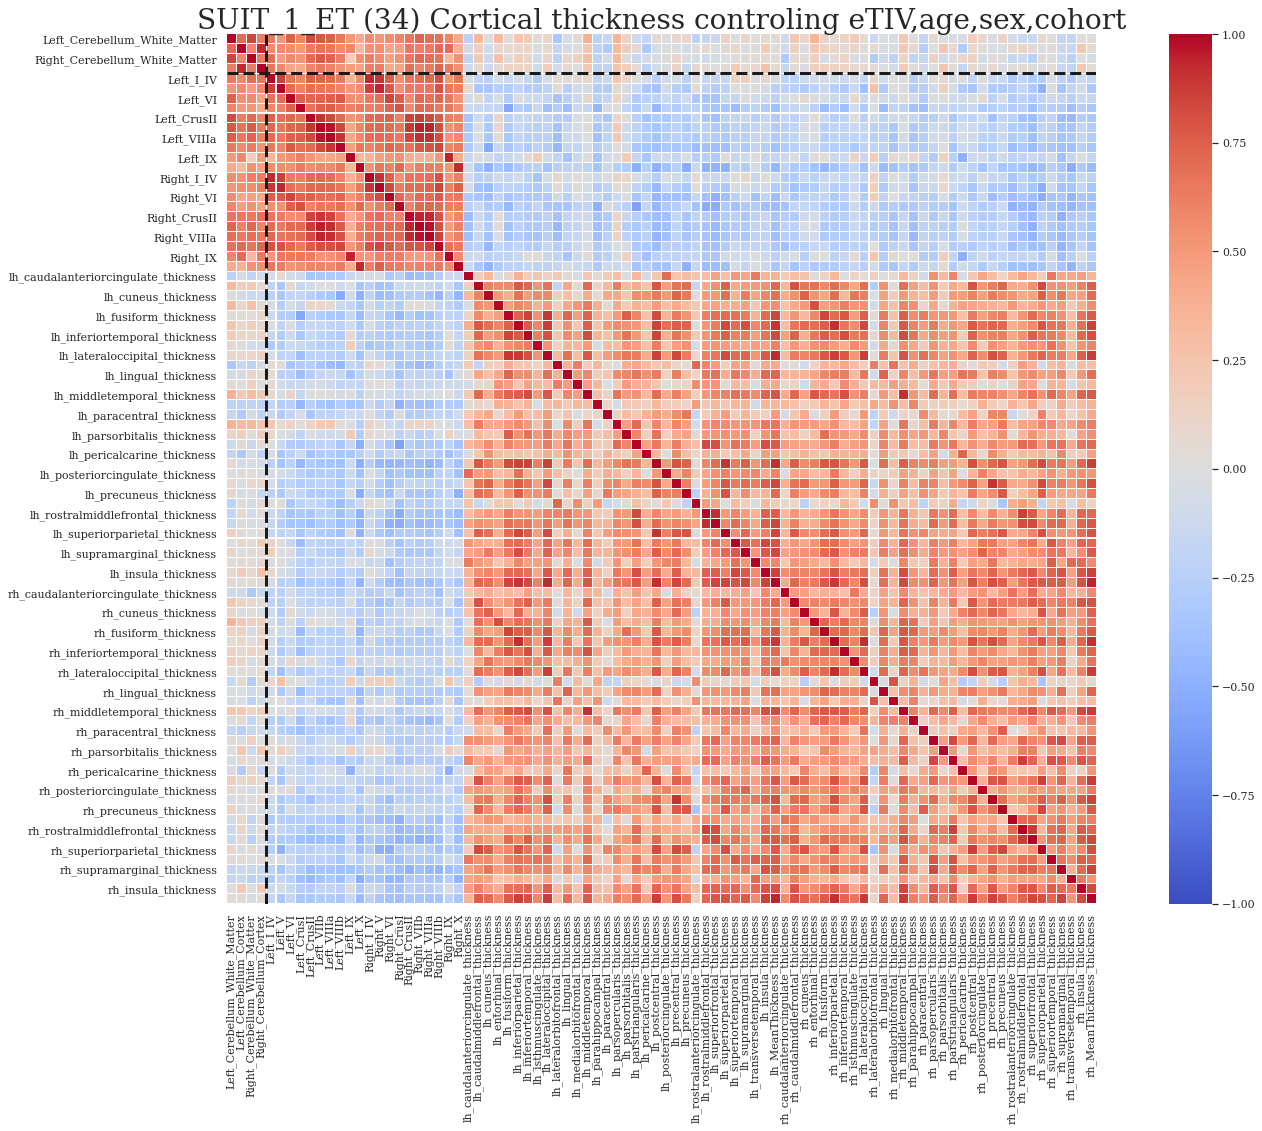

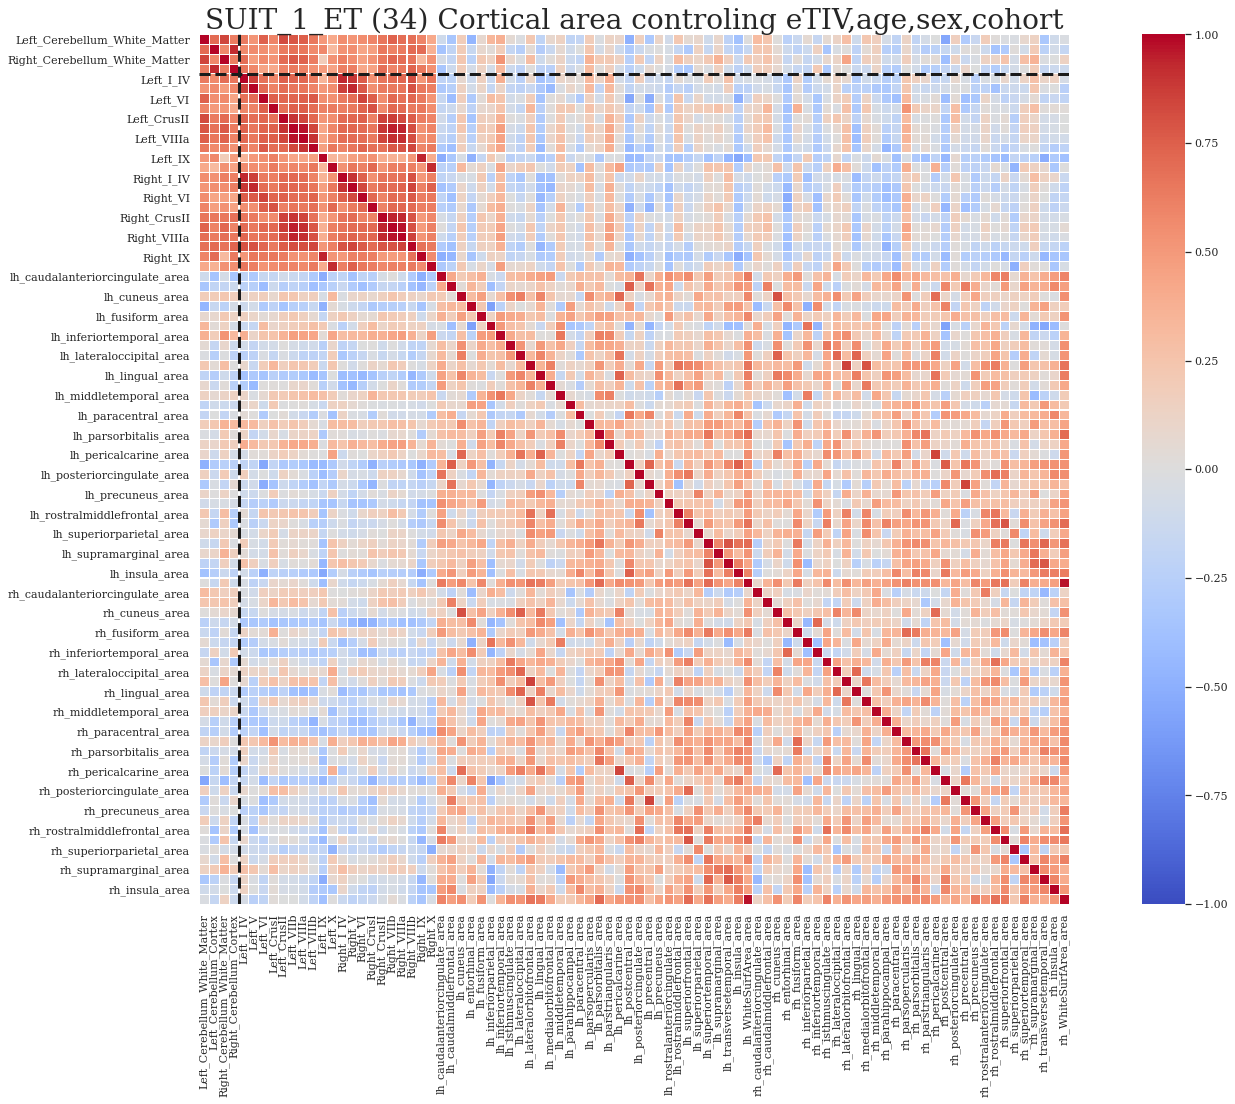

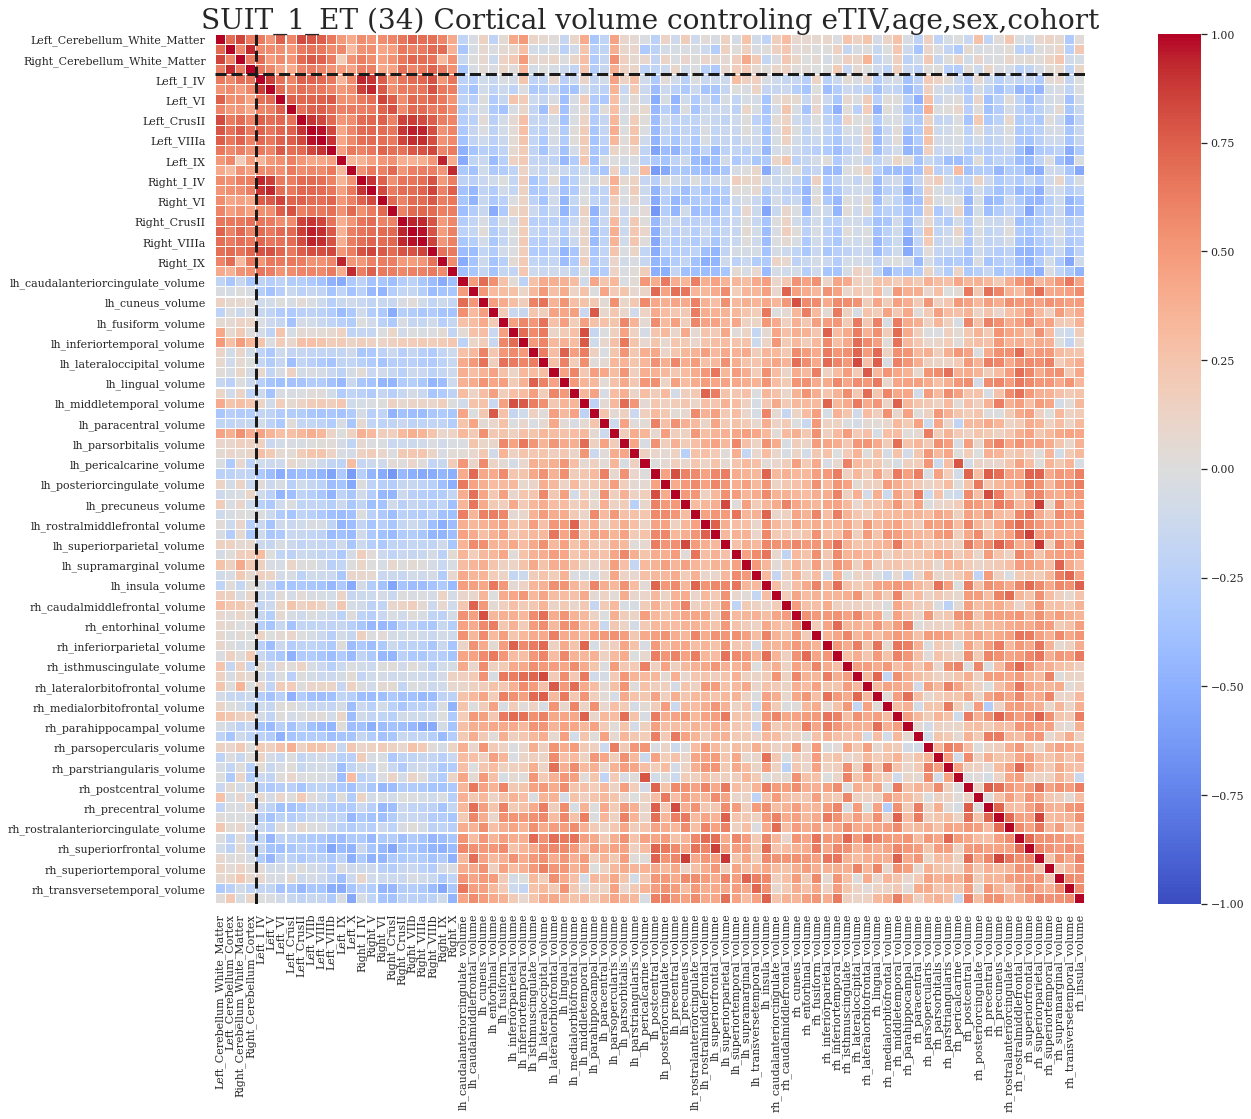

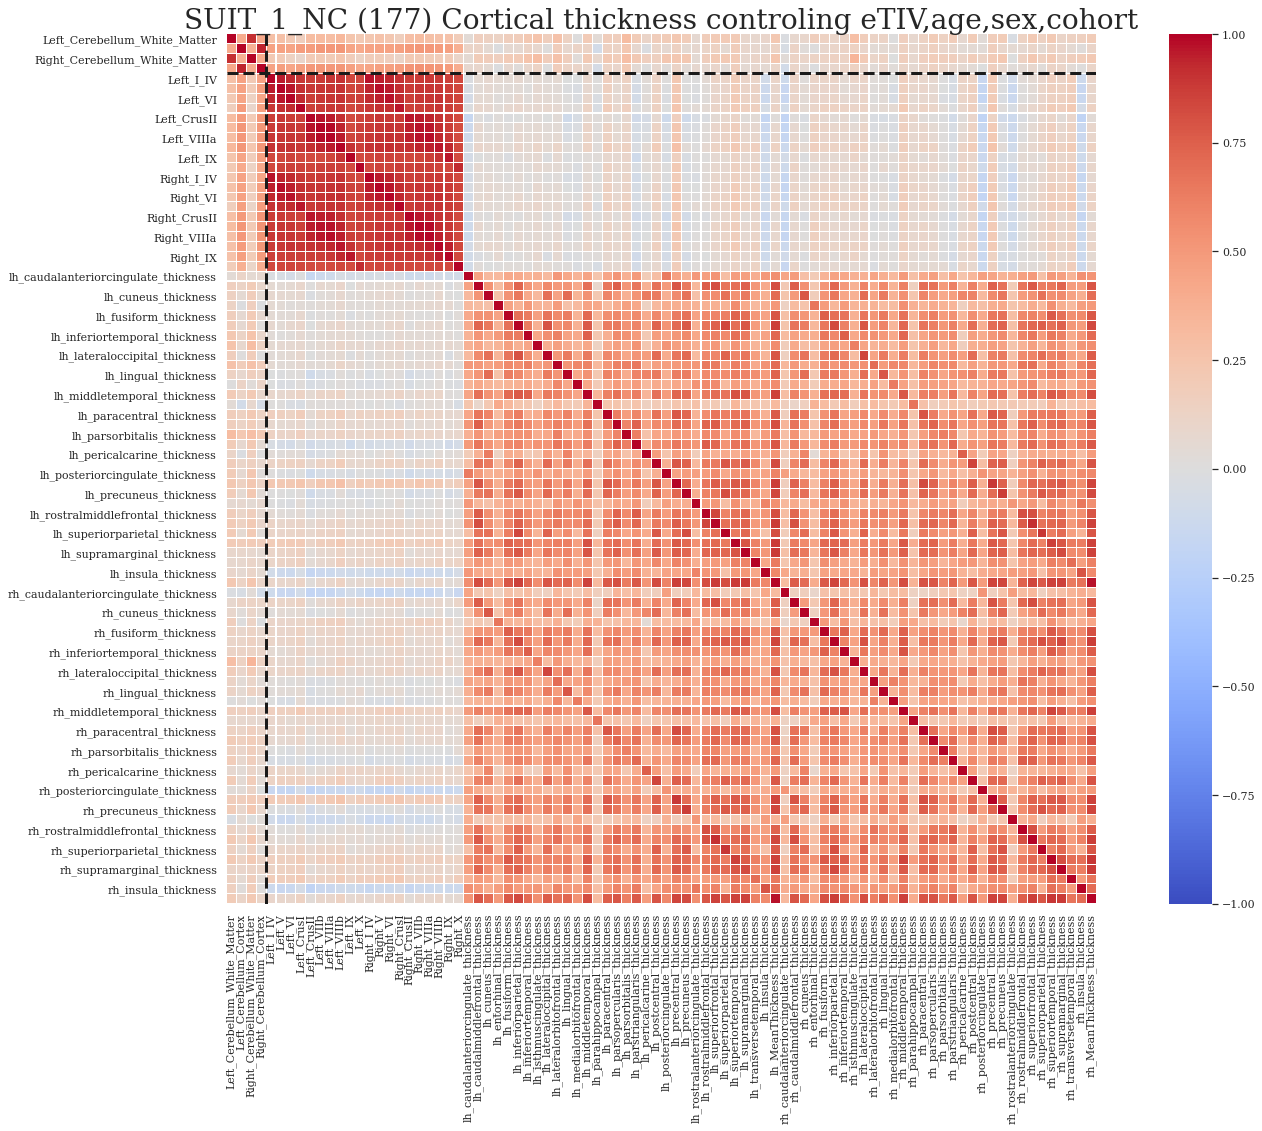

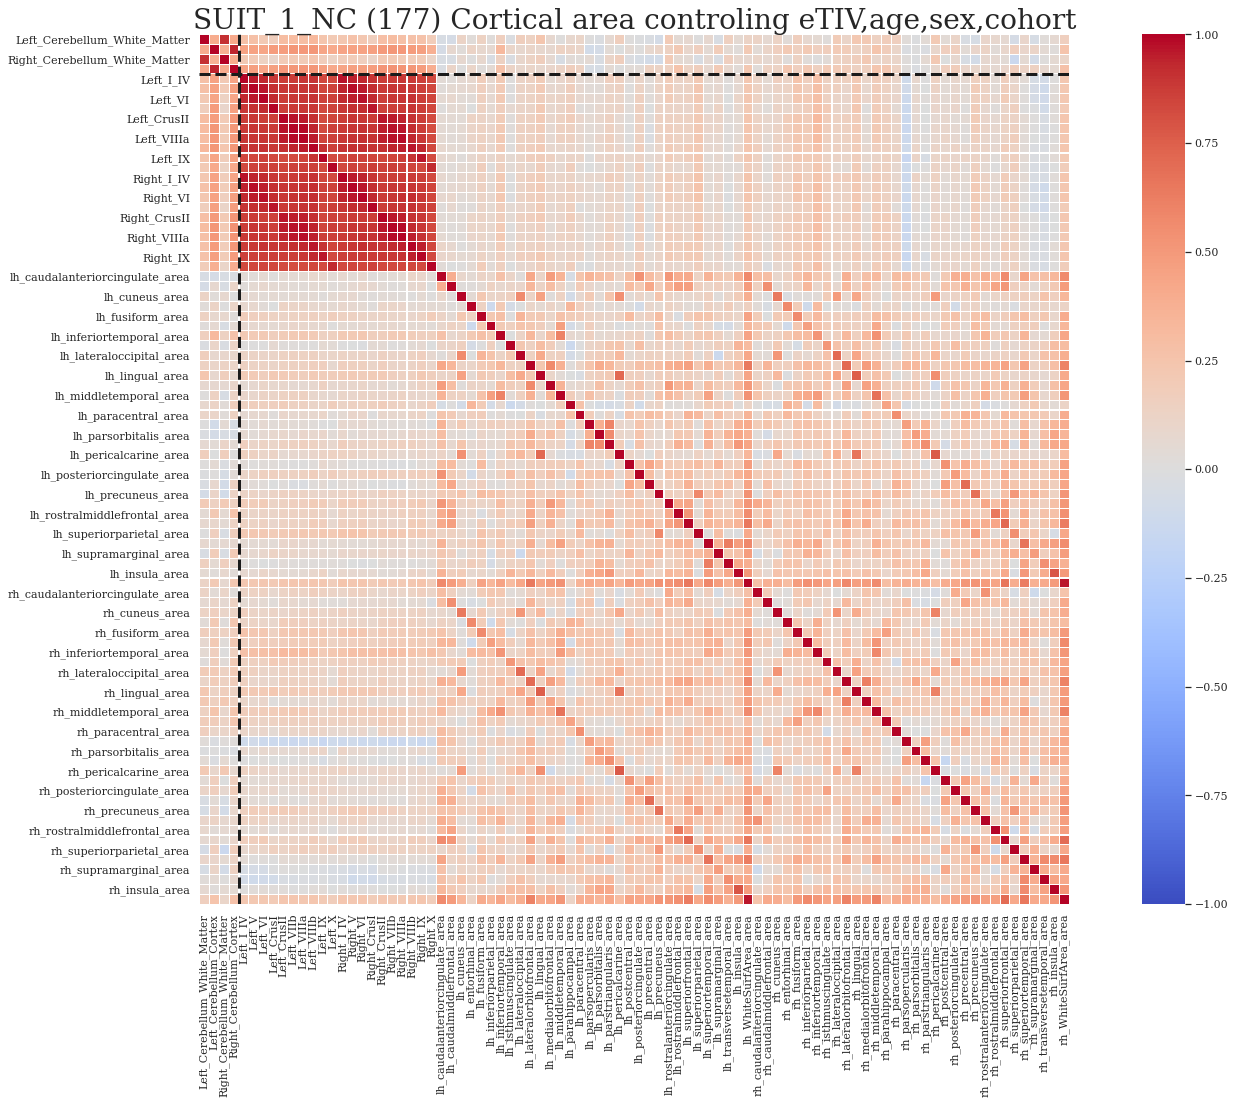

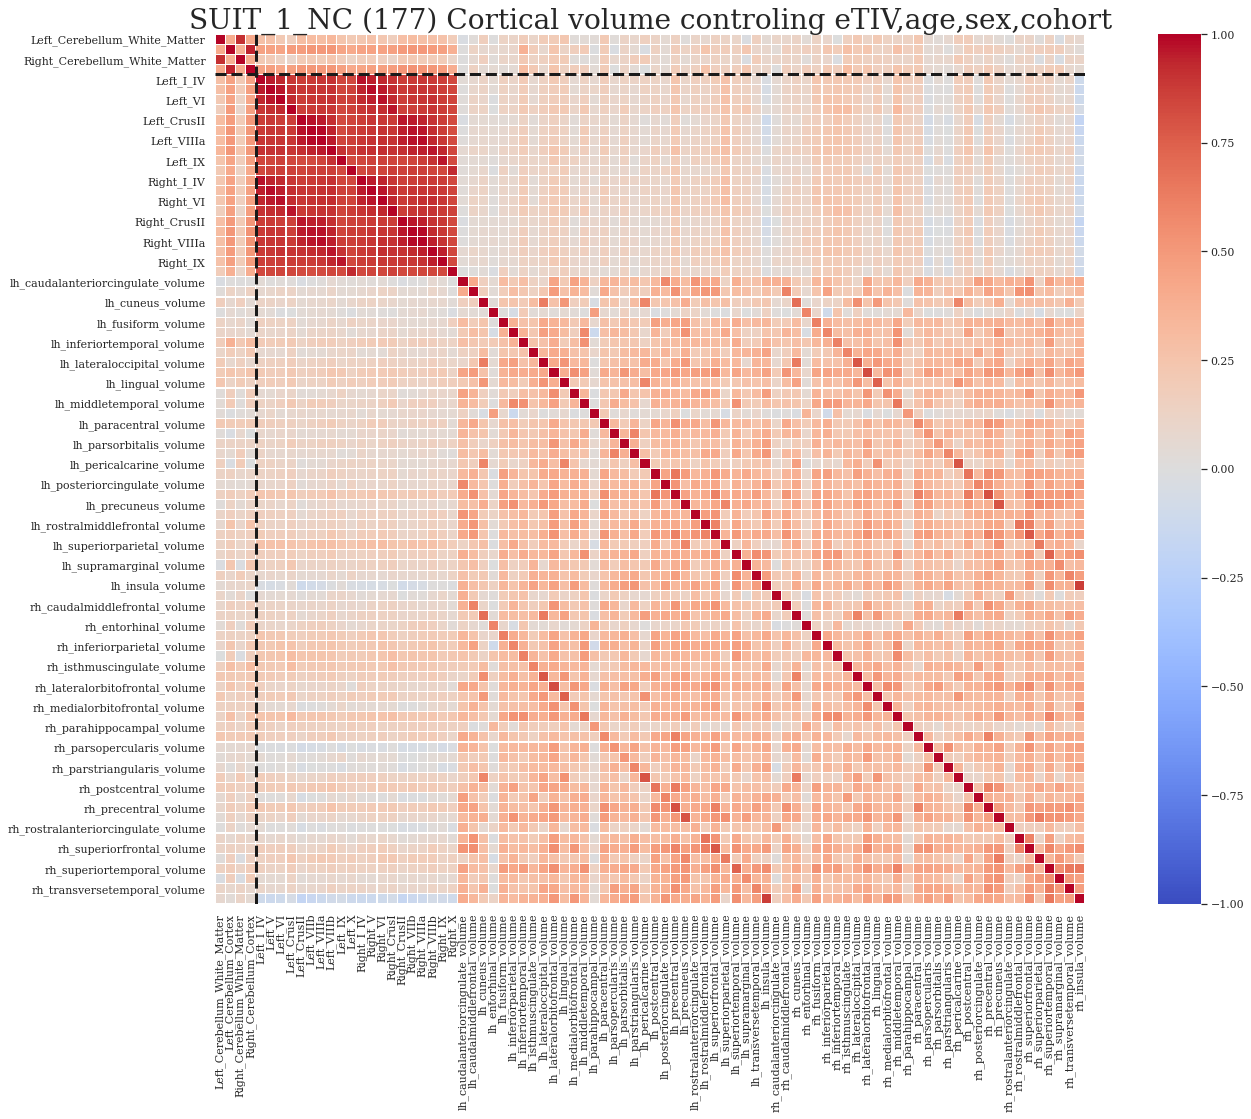

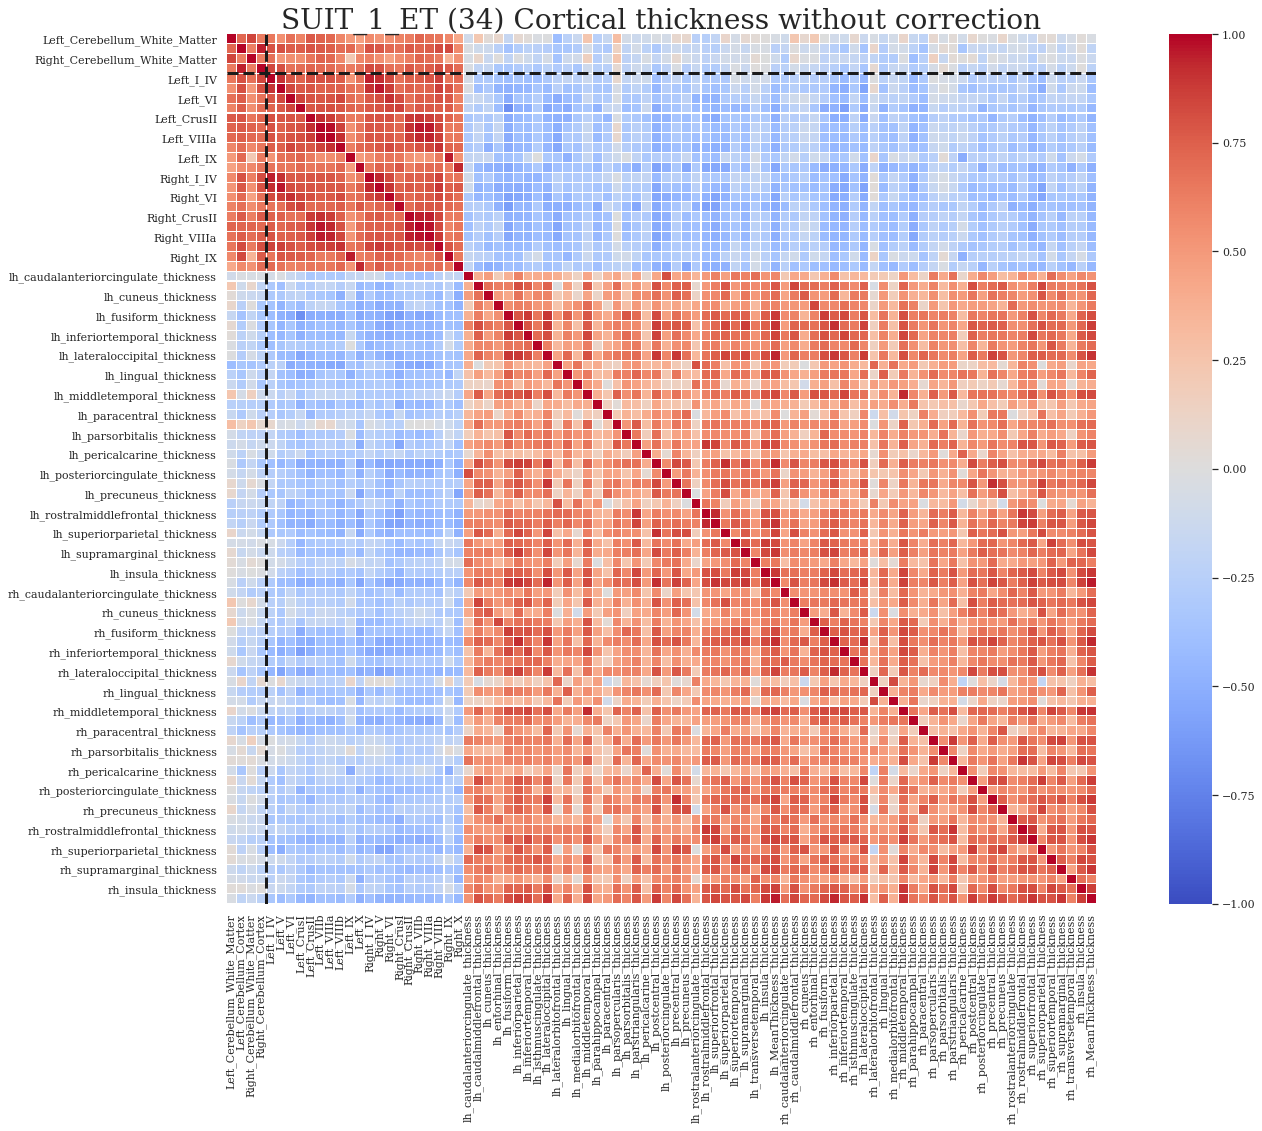

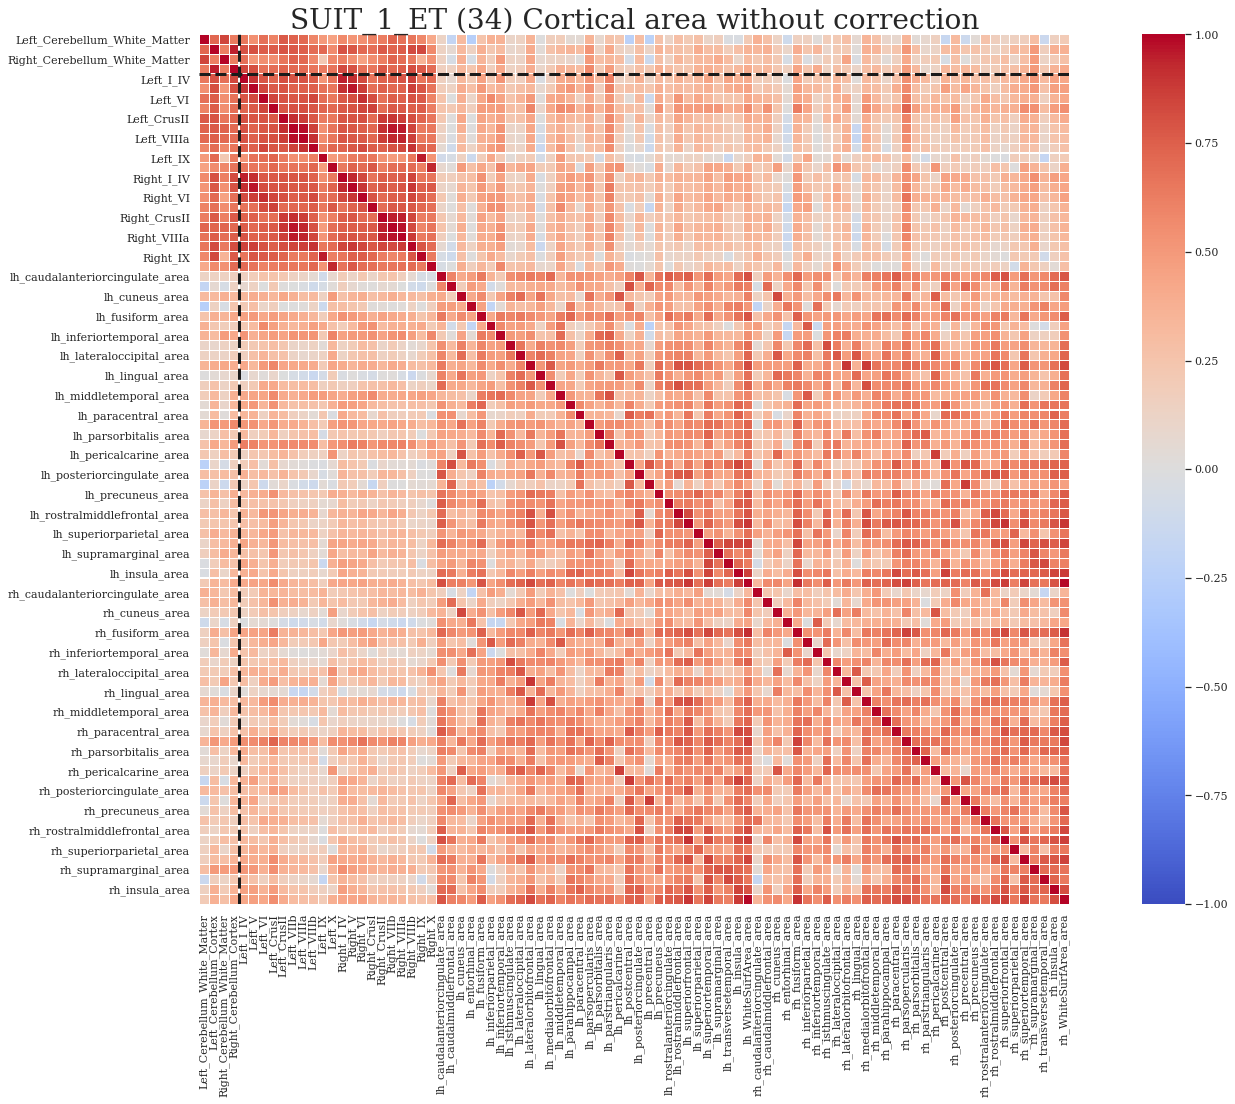

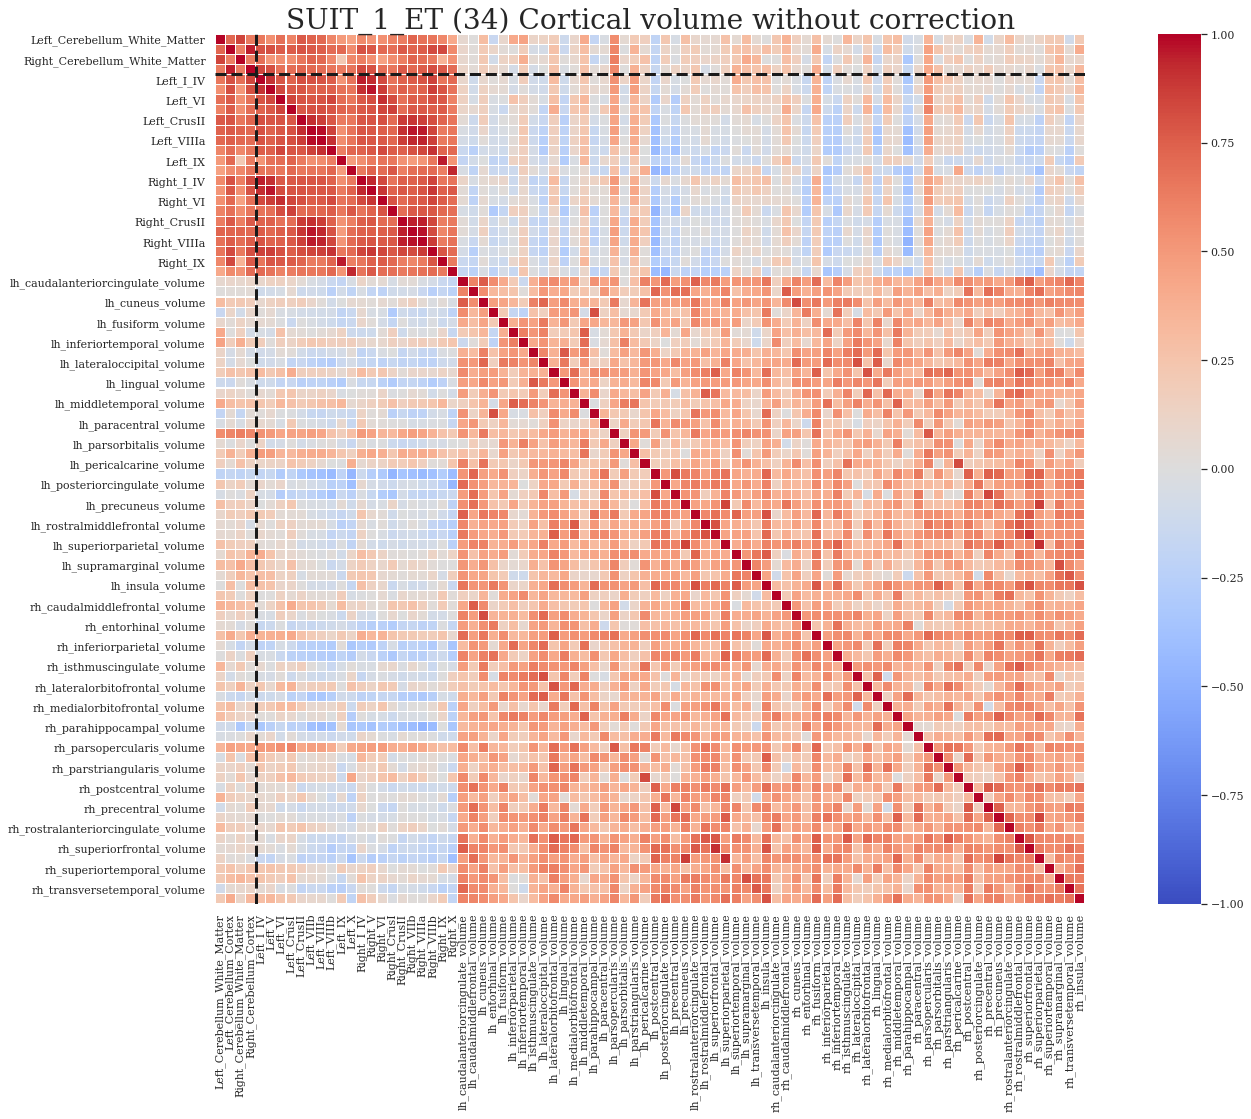

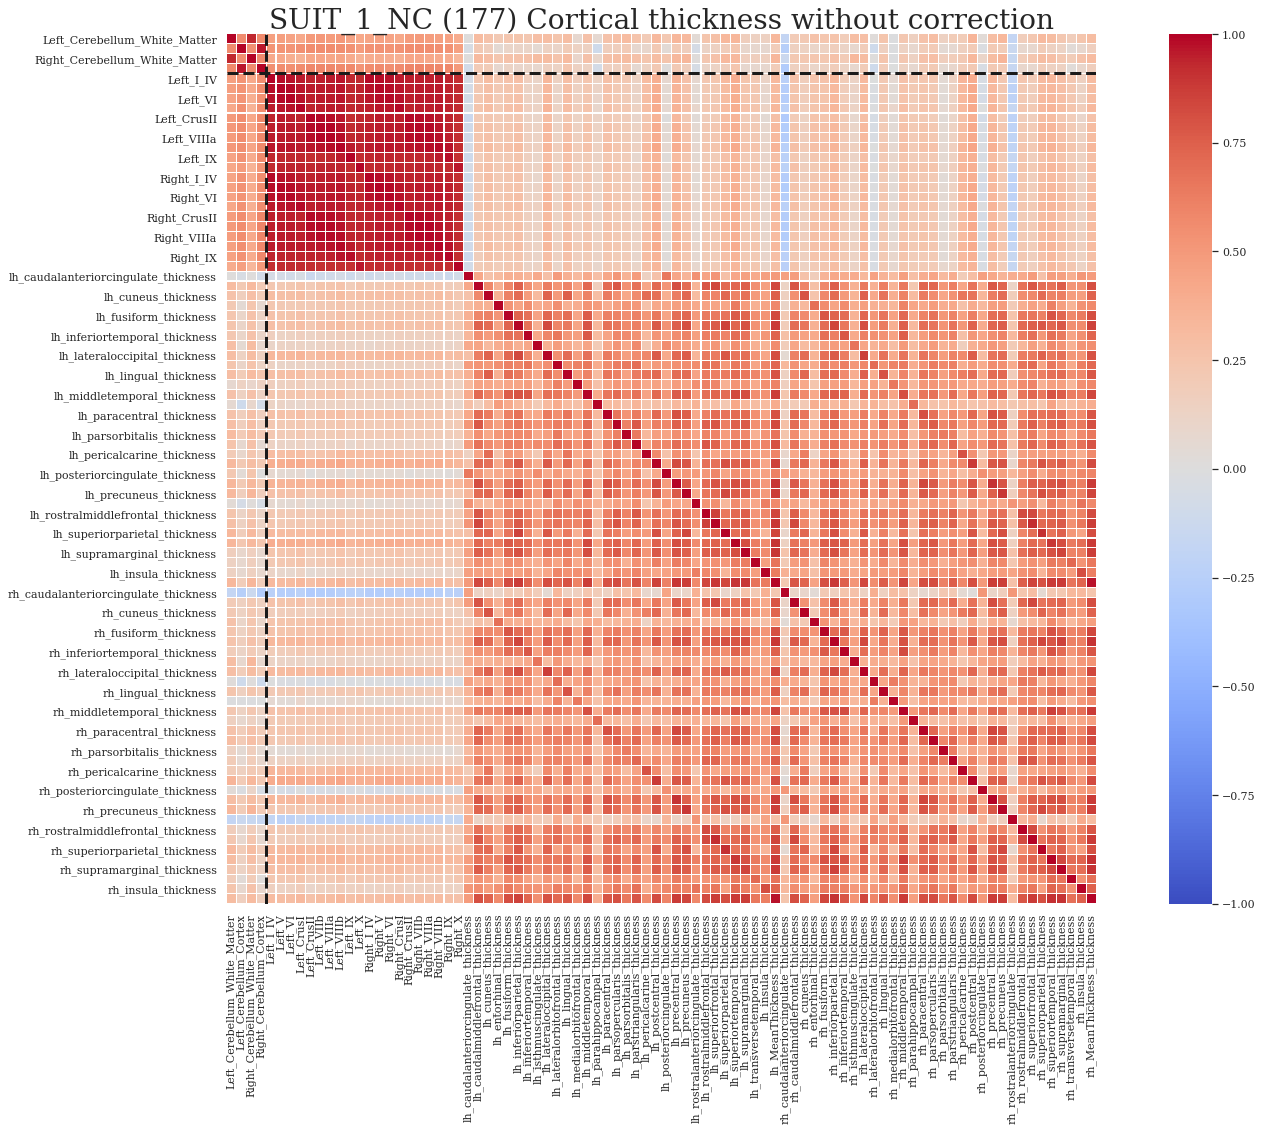

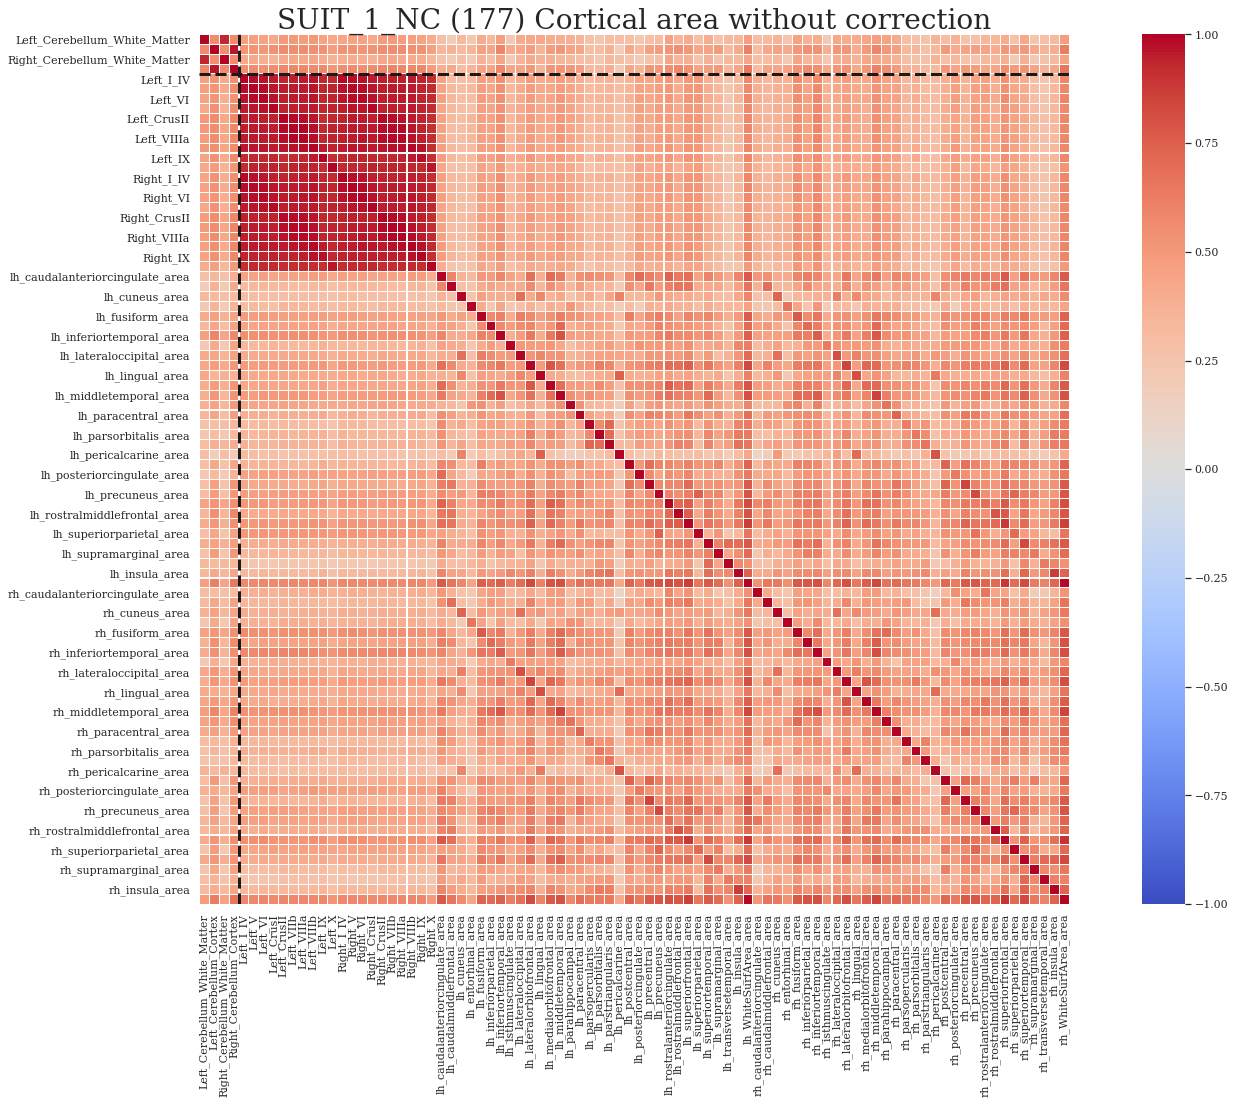

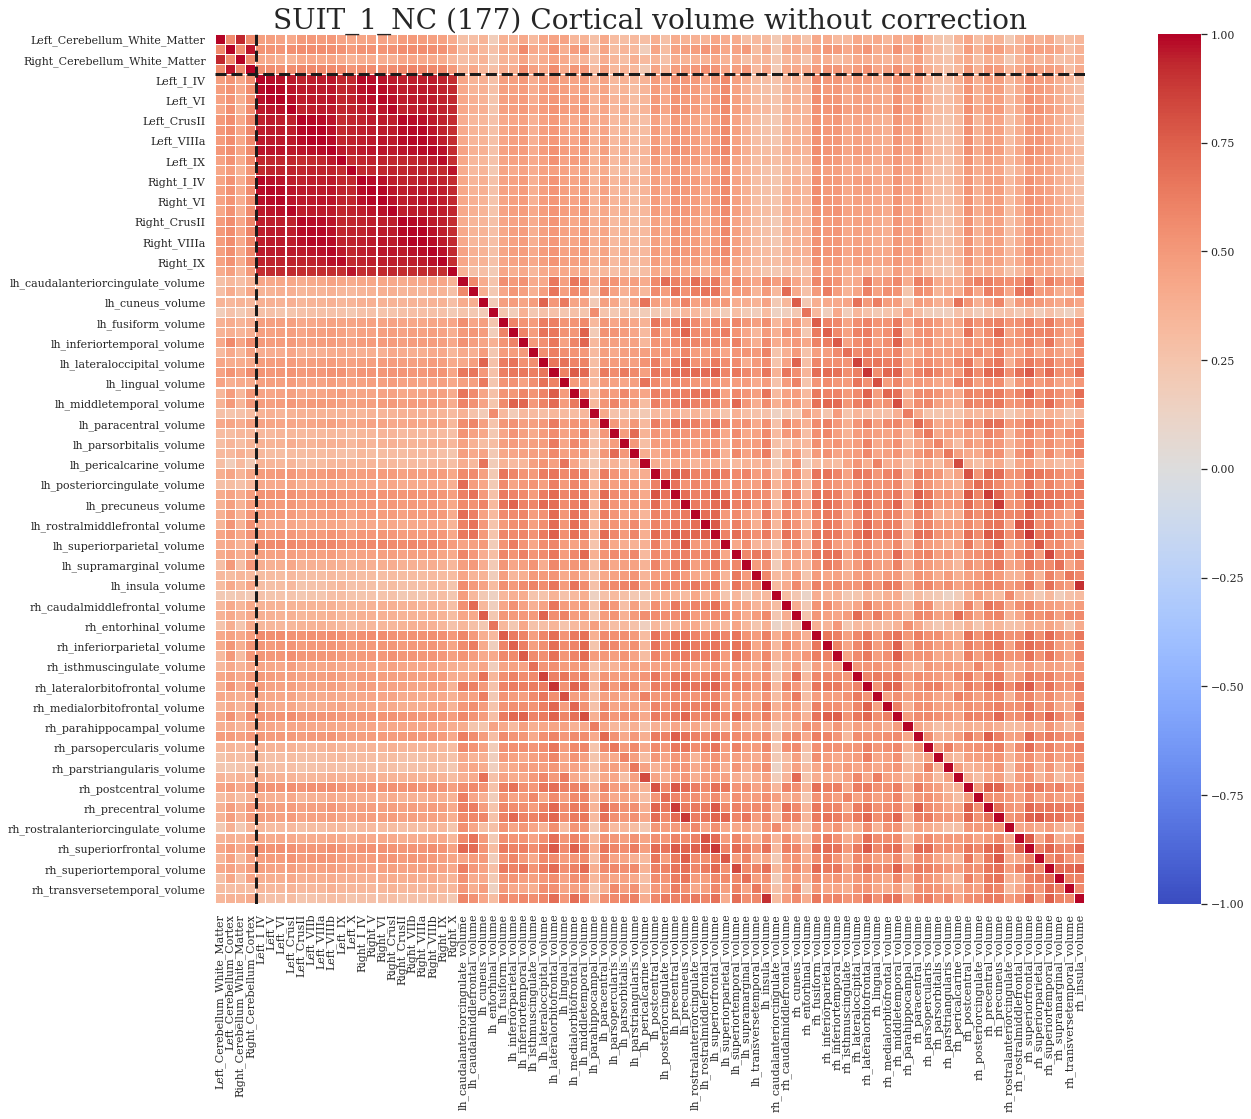

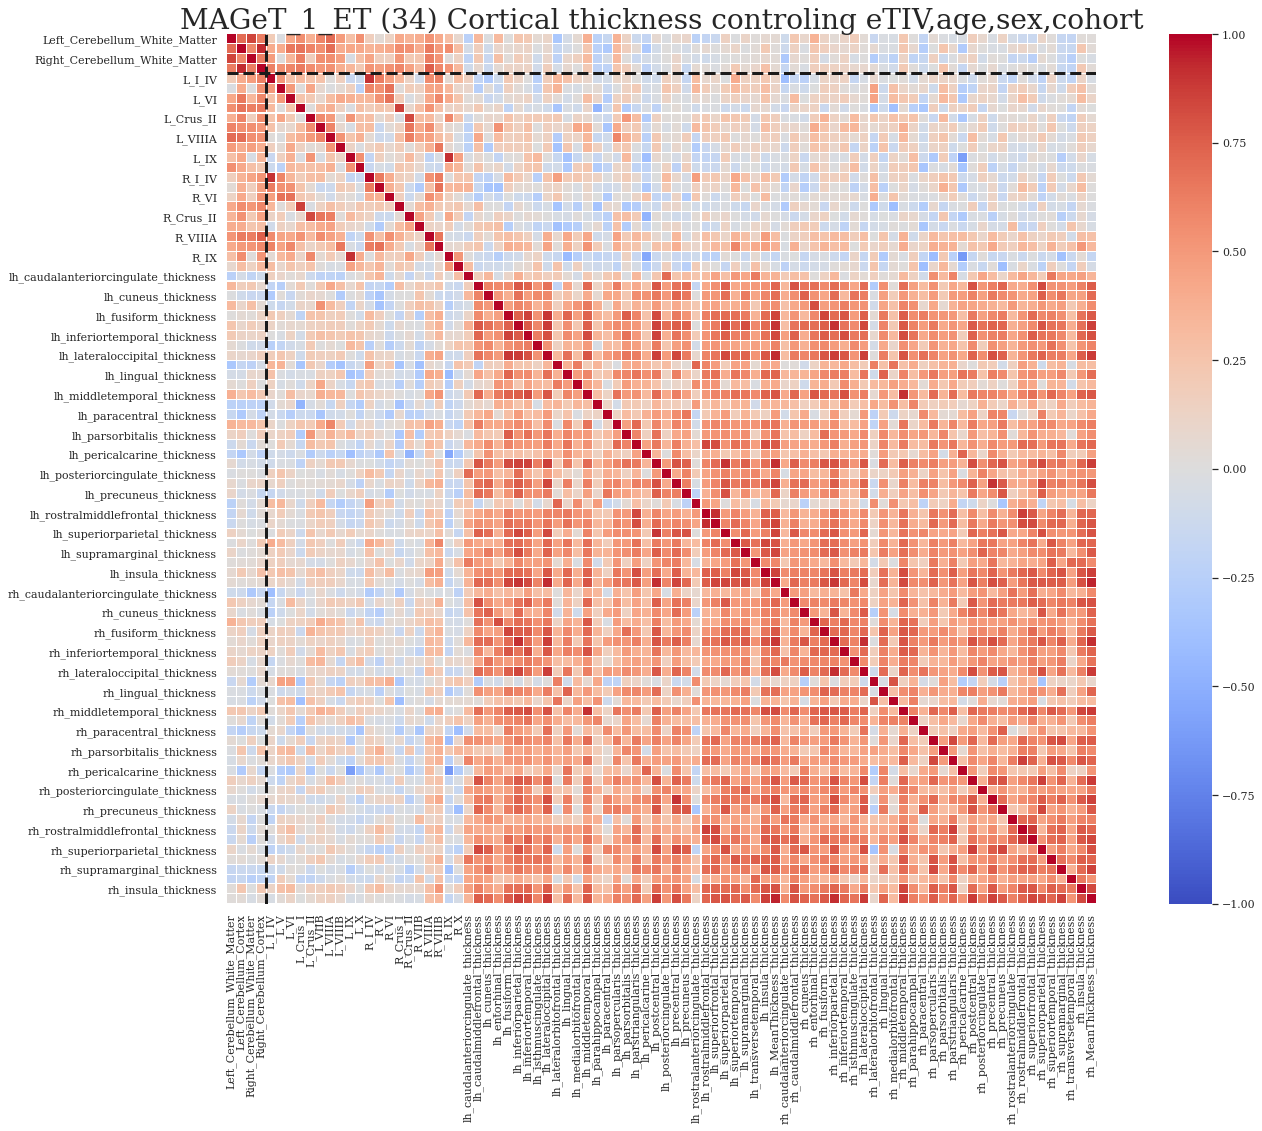

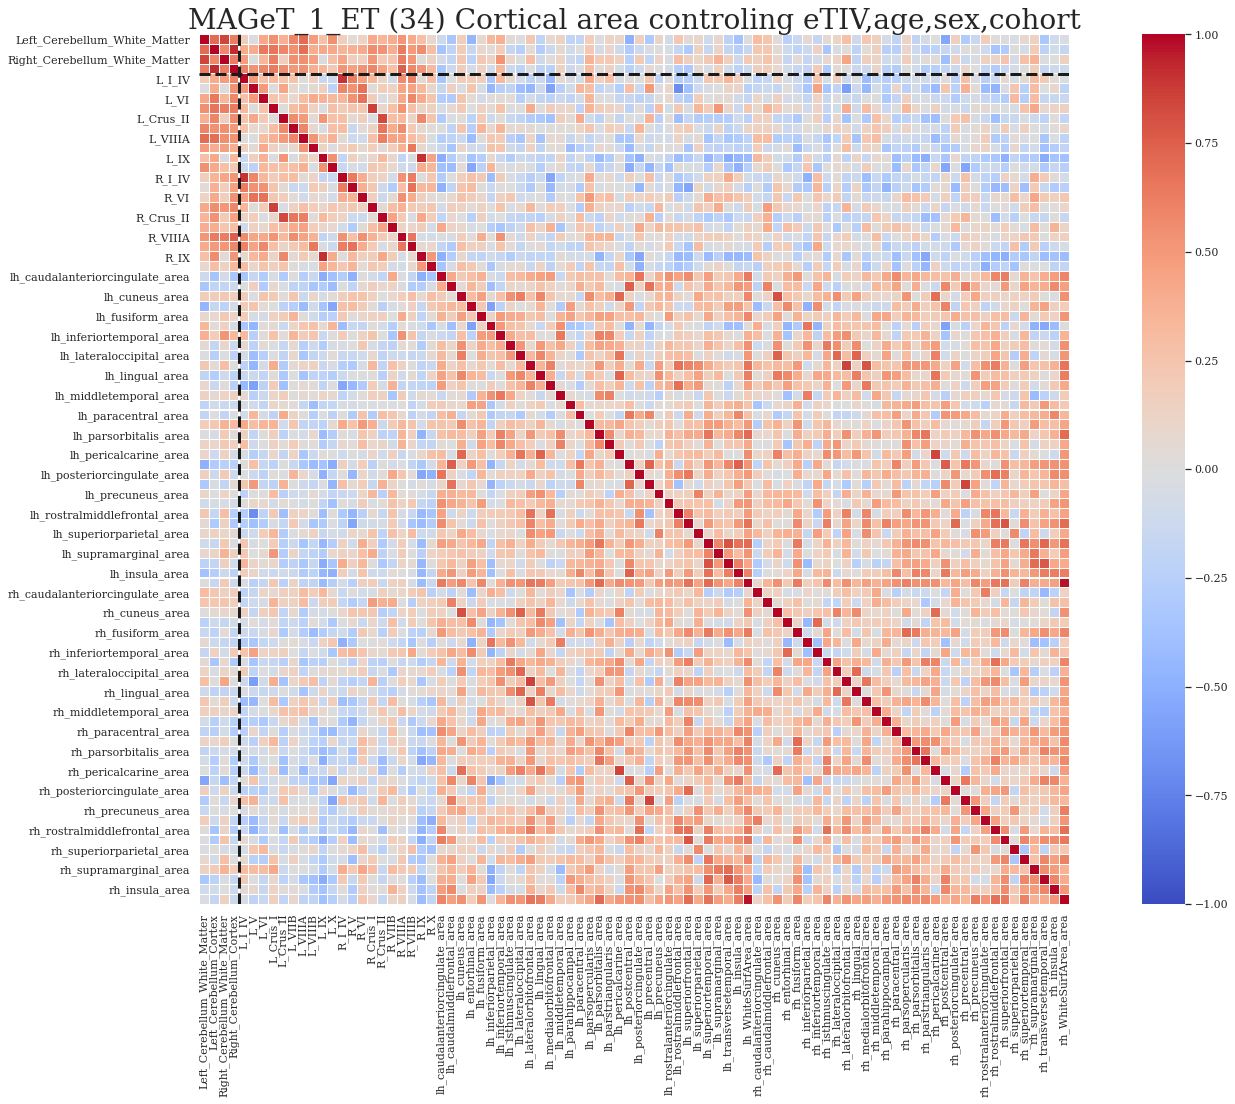

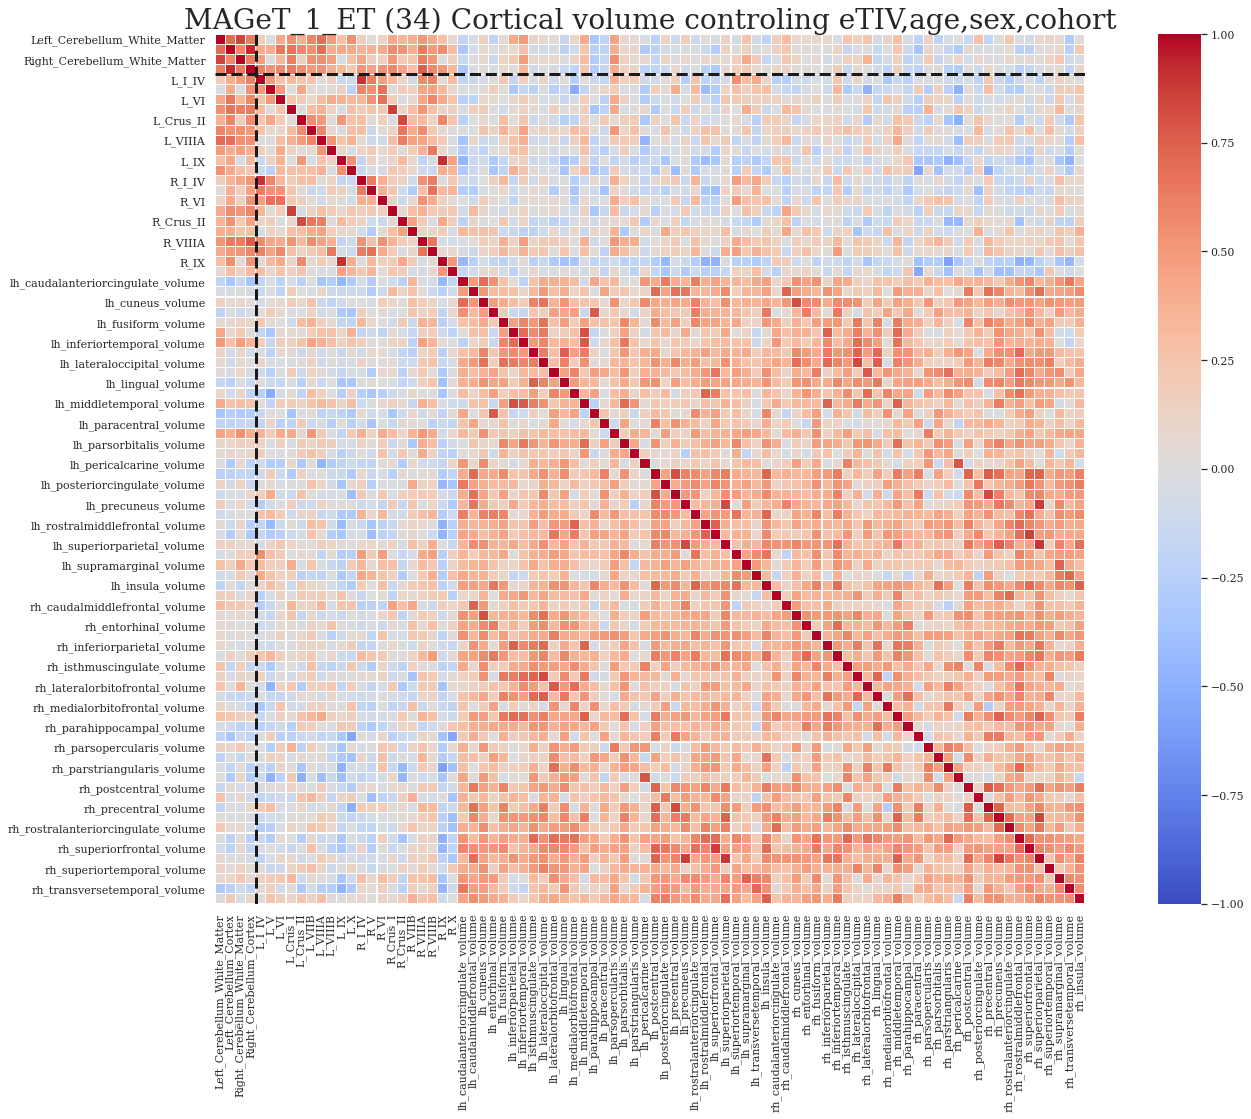

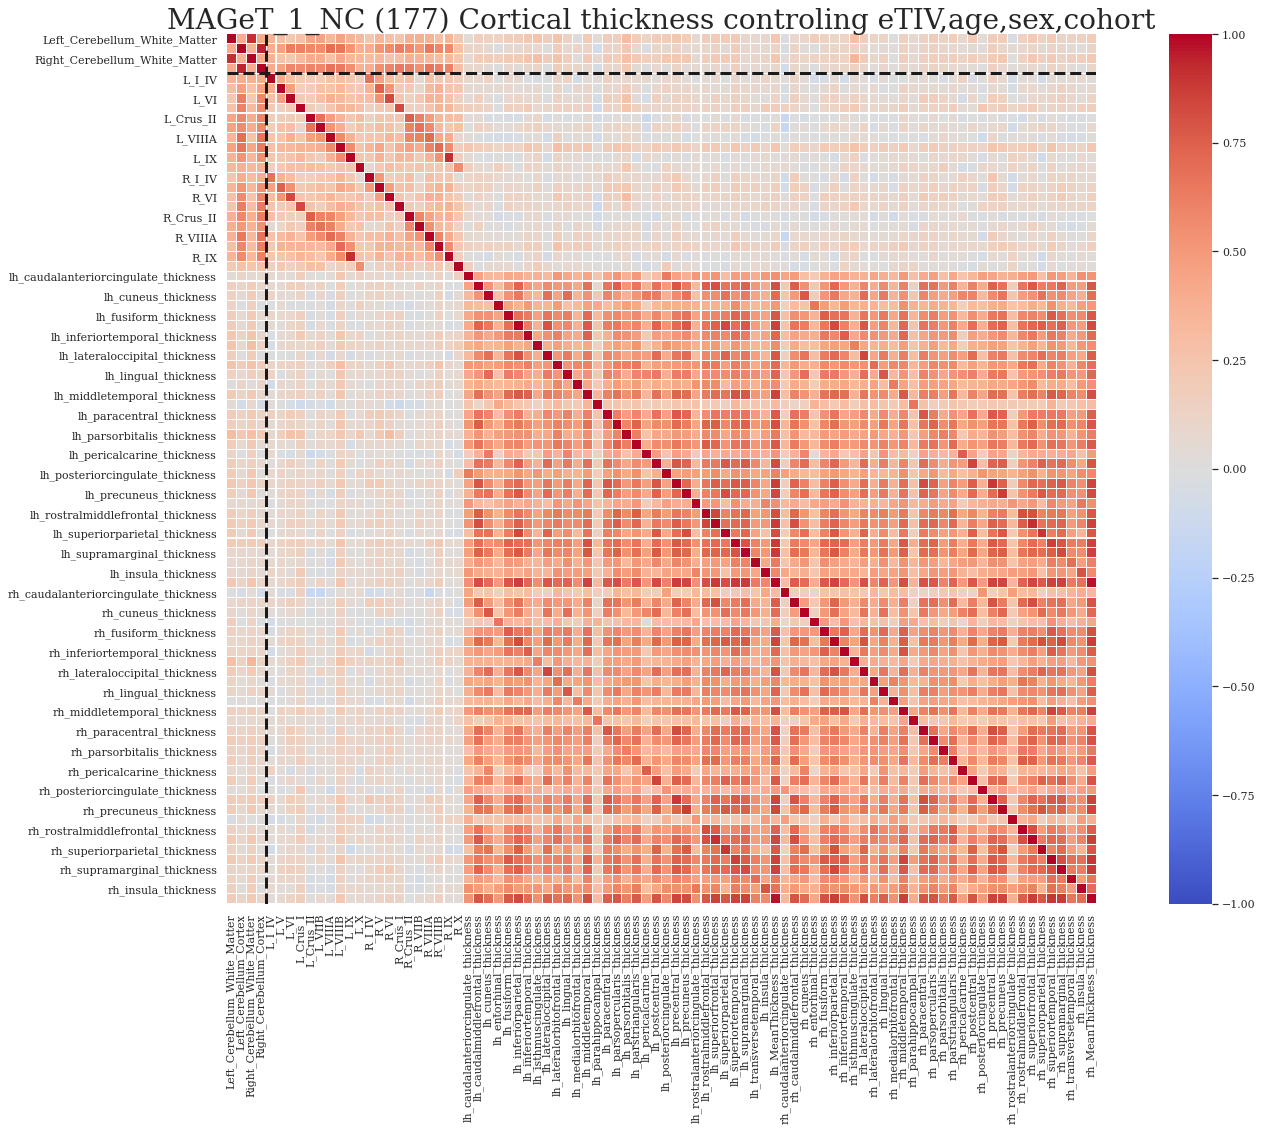

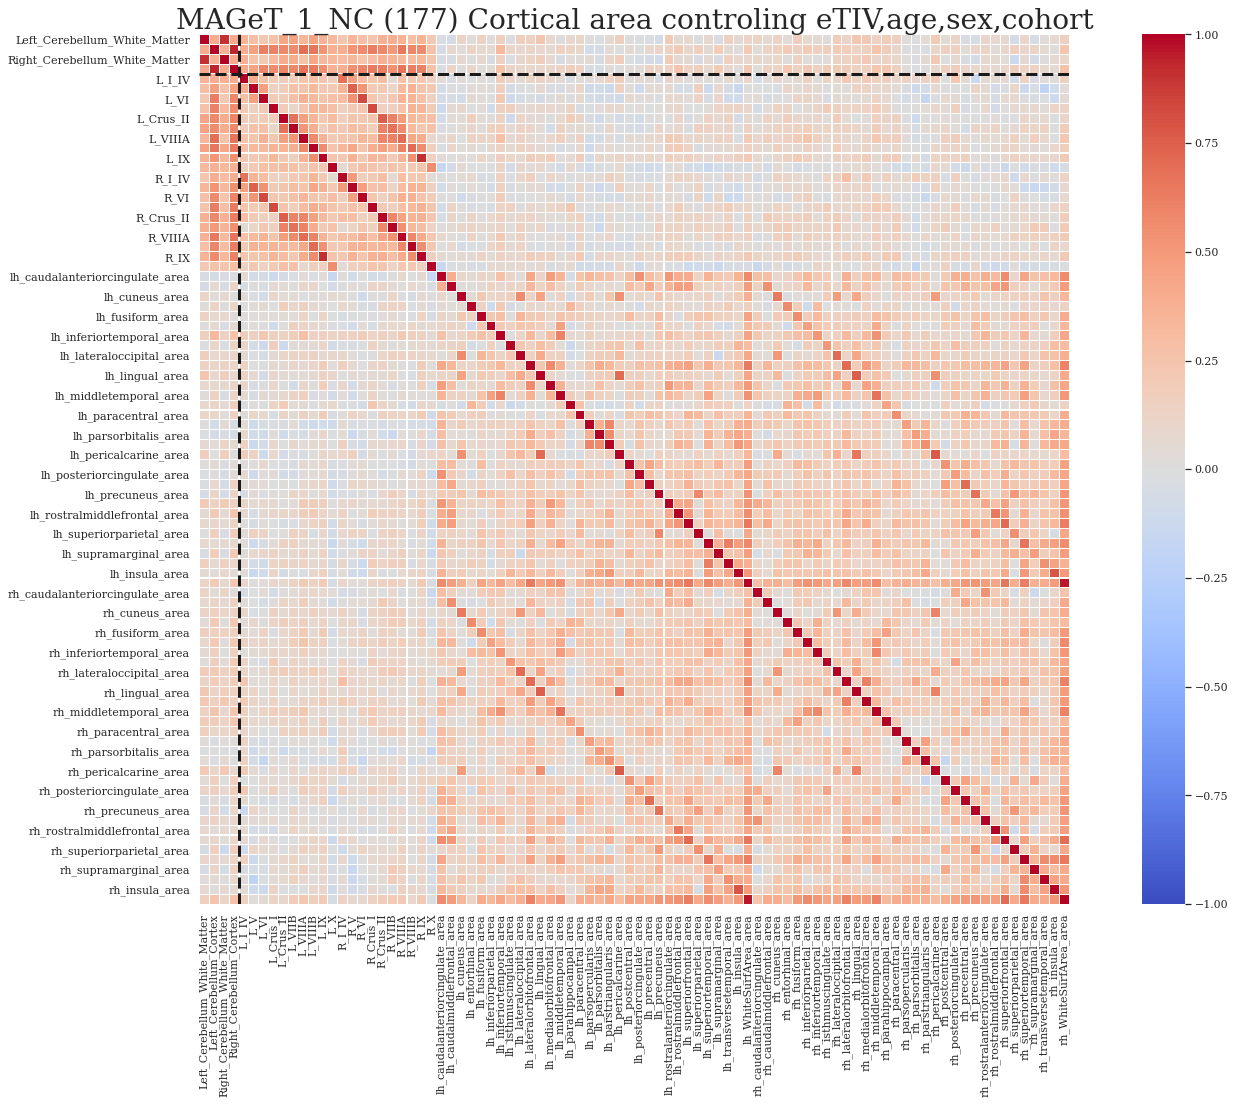

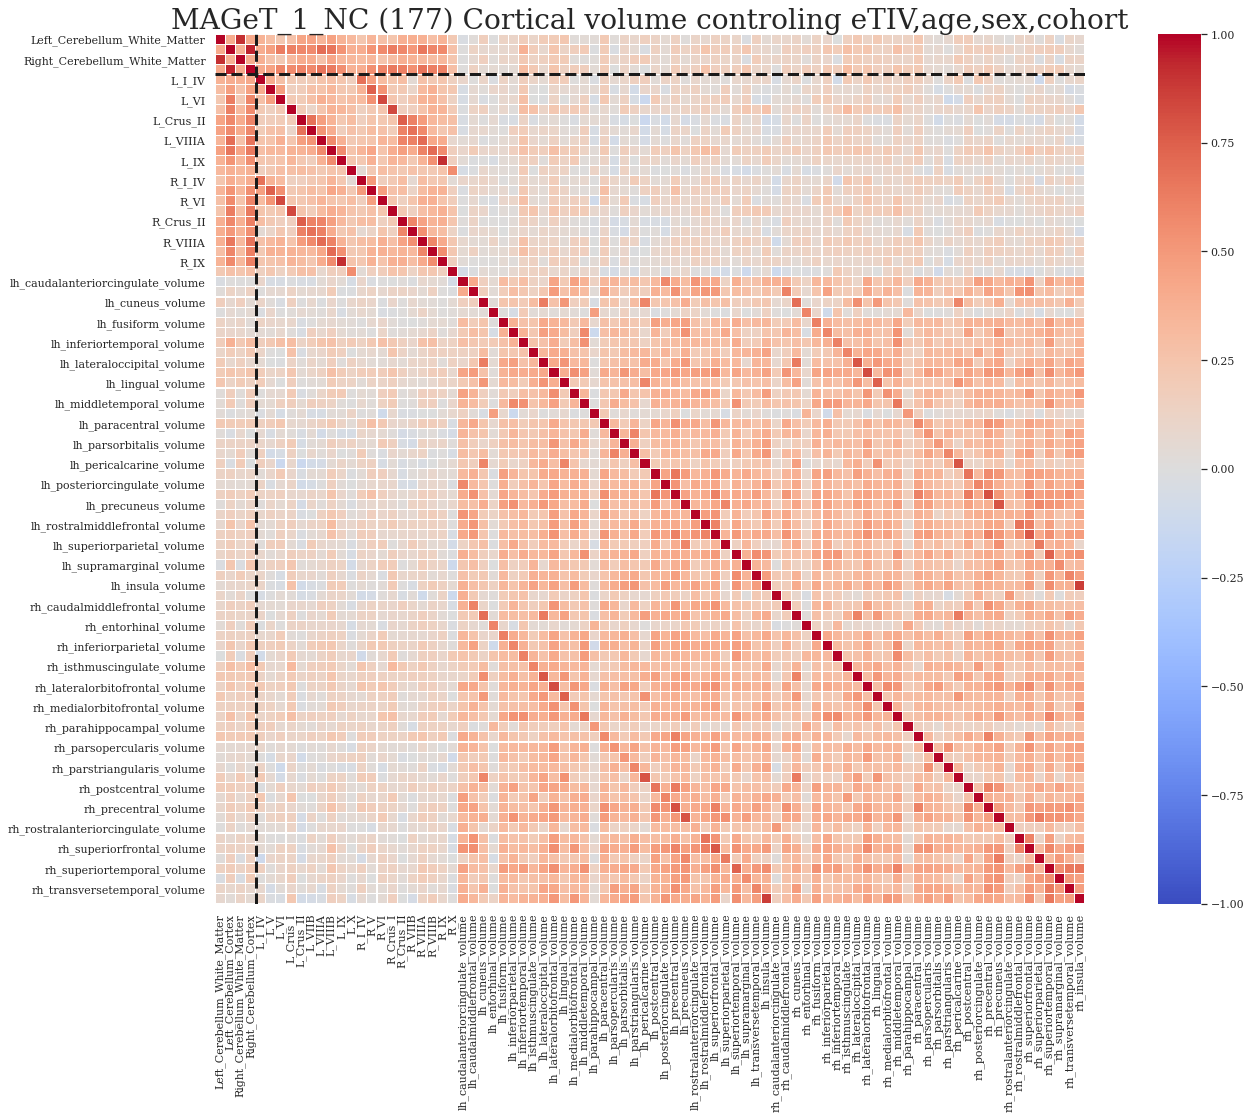

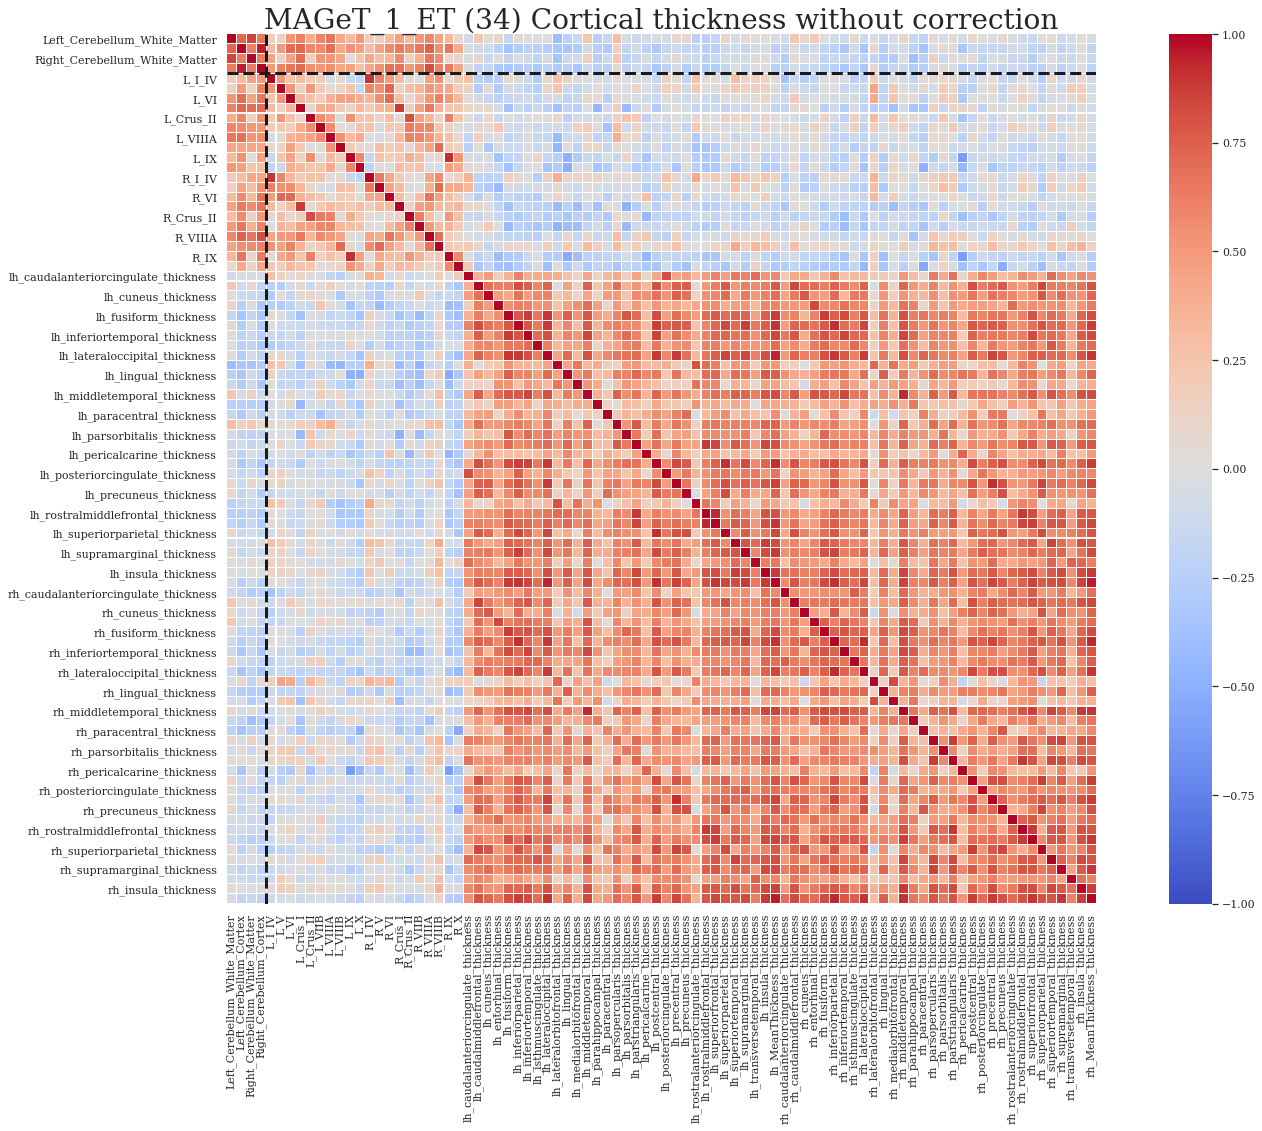

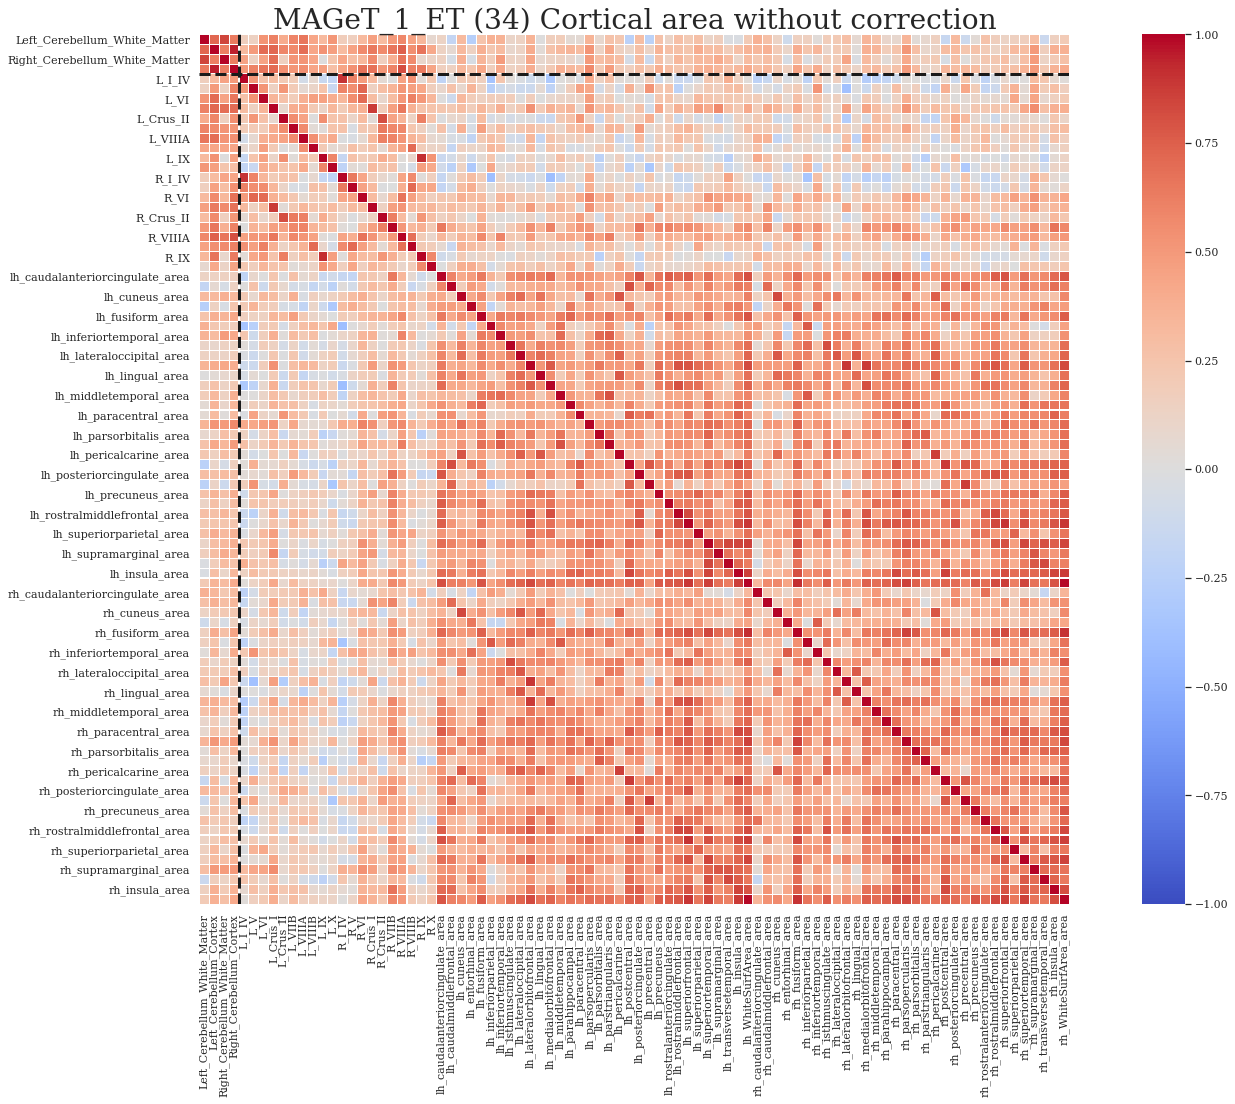

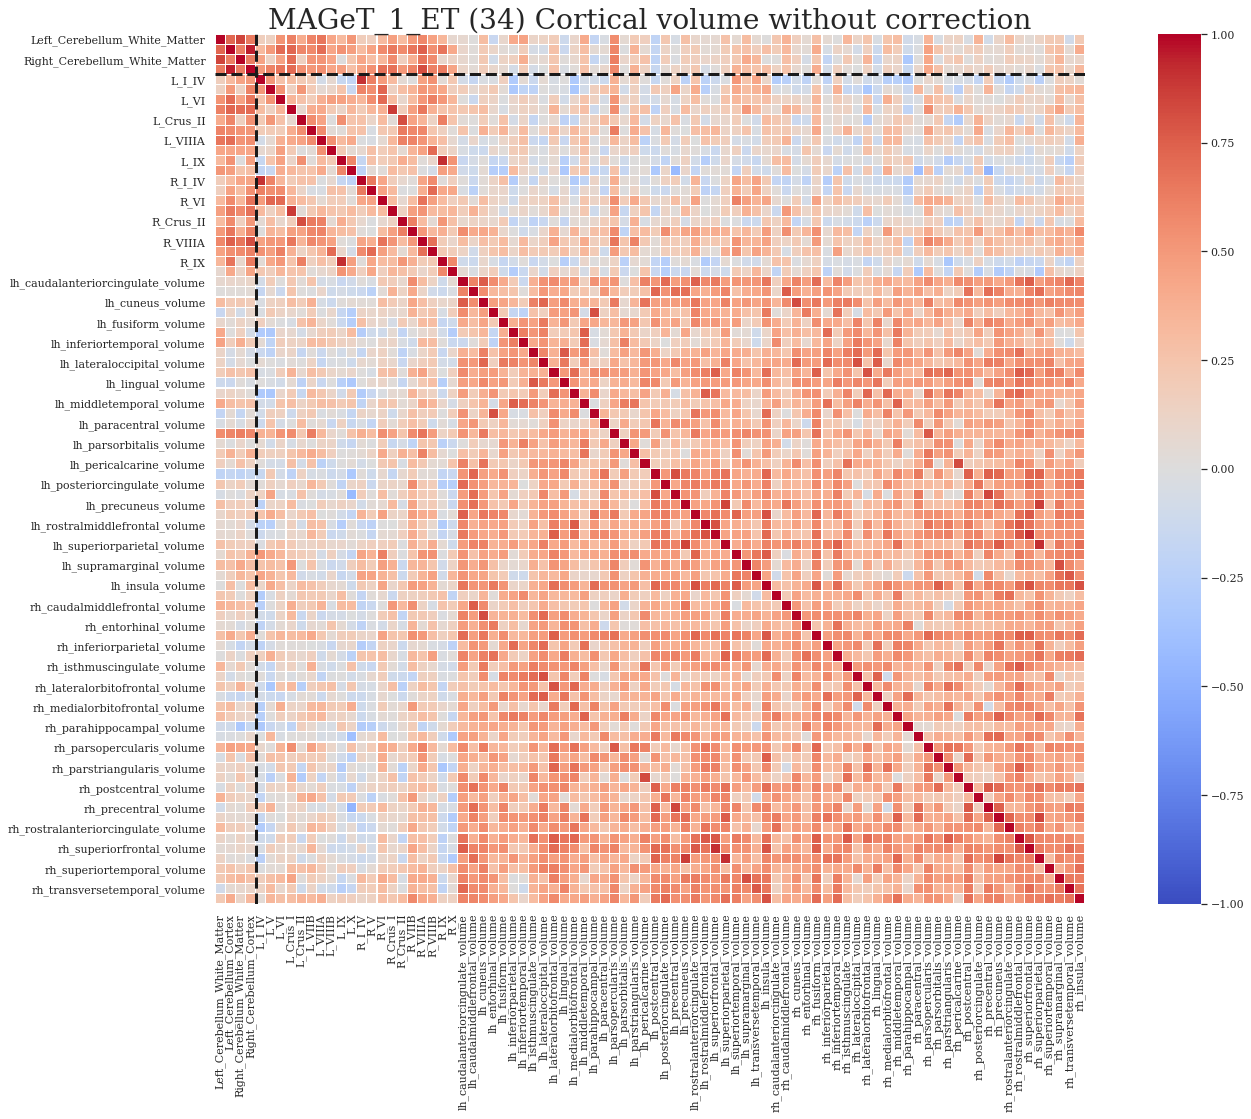

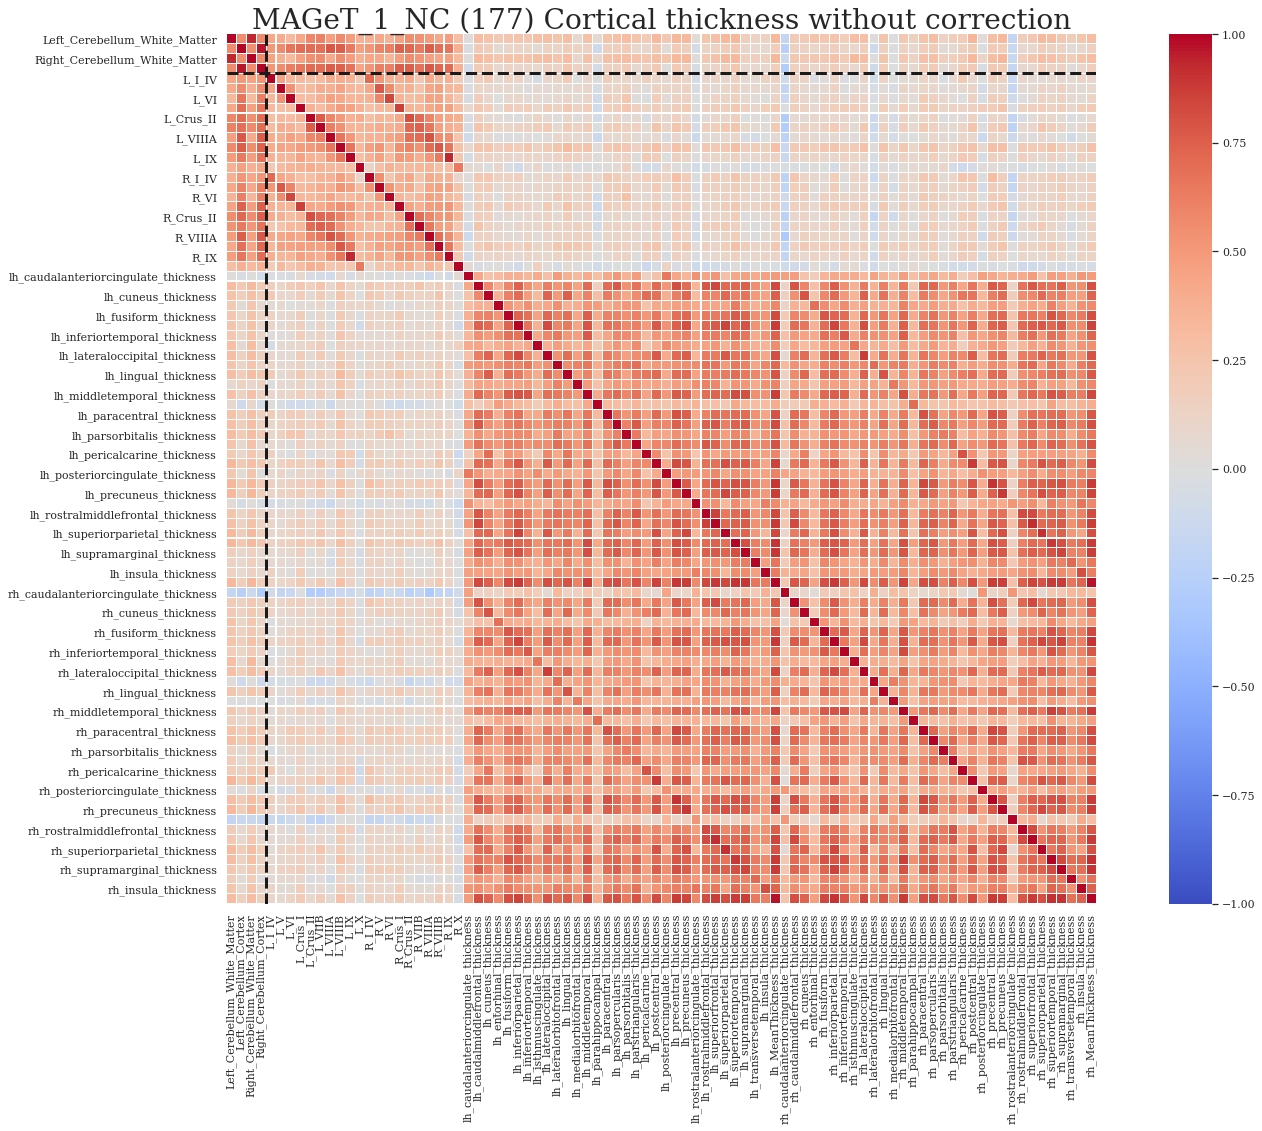

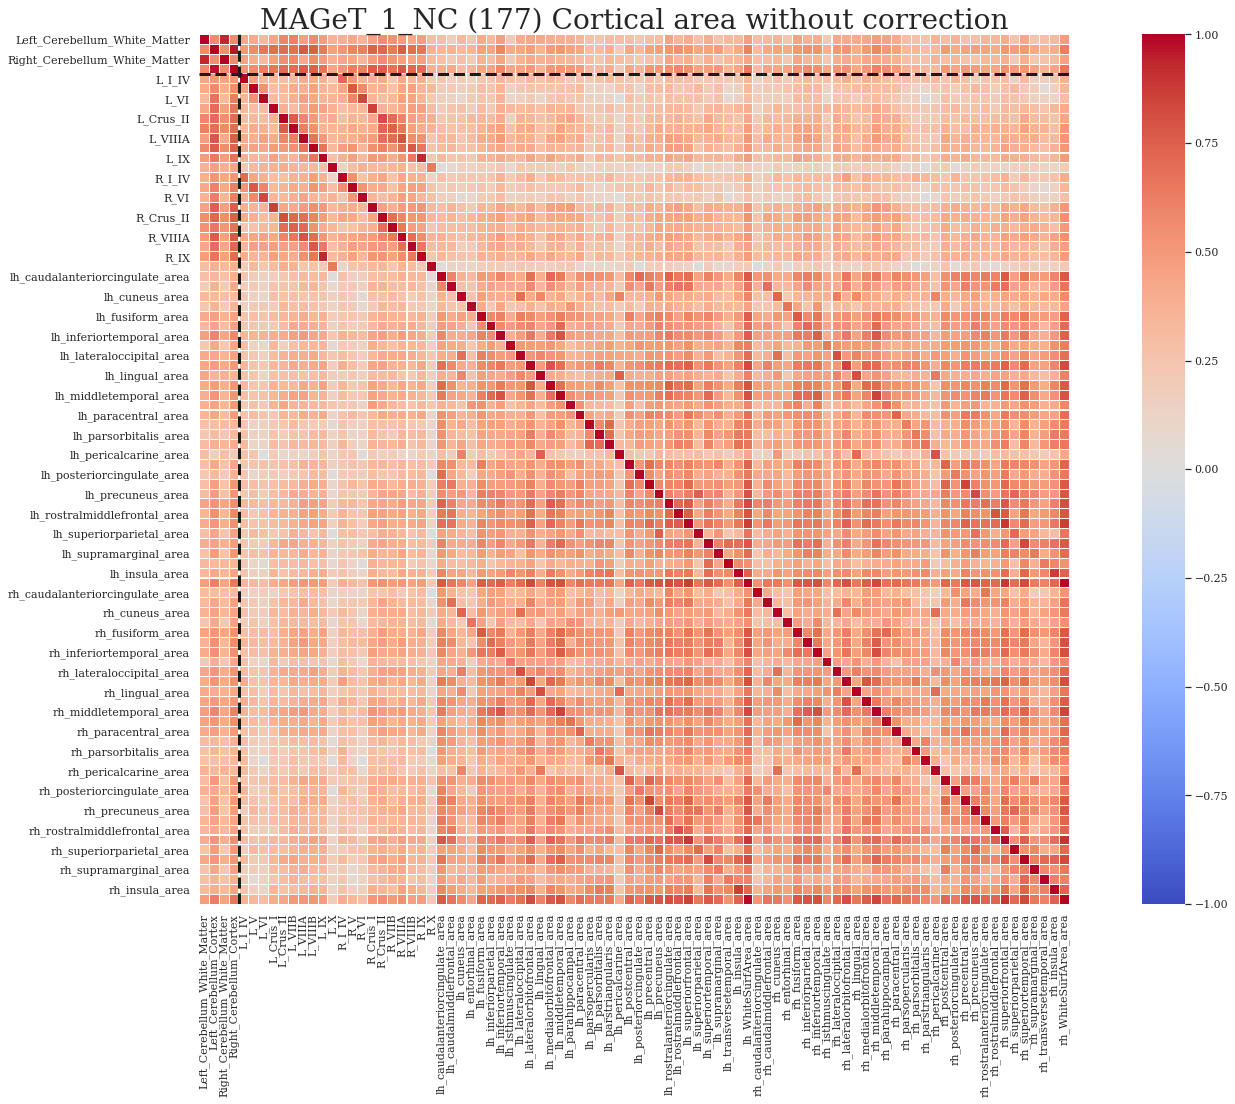

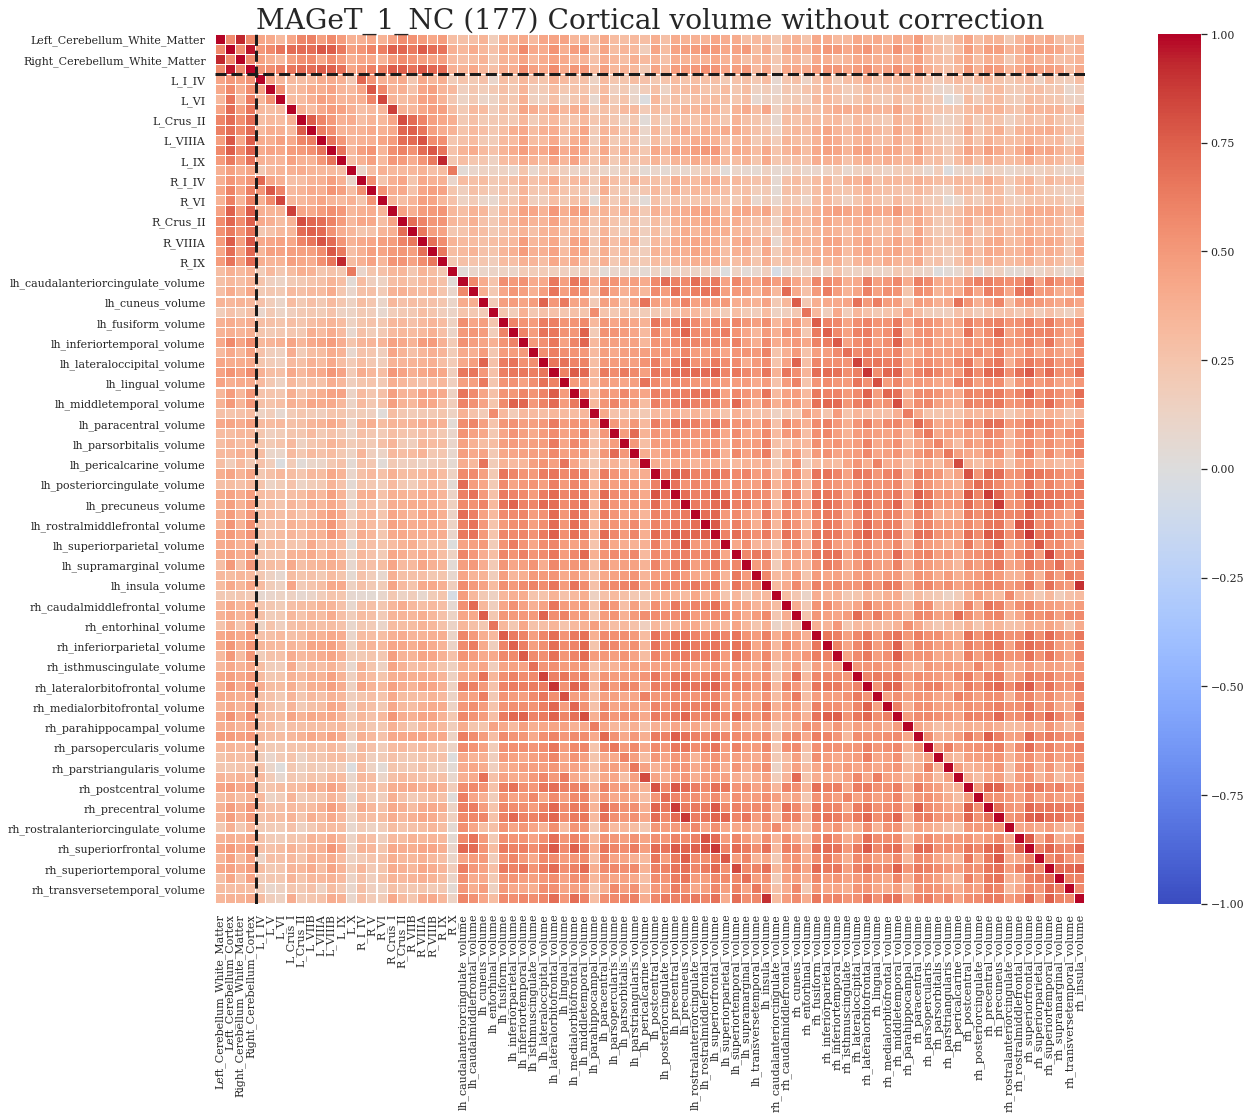

In [4]:
# Direct comparison of cortical thickness/cortical volumes/cortical area
figure_size=(26, 16); 
FONT_SCALE=2.4;
legend_font_size=24
save_fig=1
C_MAP='coolwarm'; TH=0

def vis_corr_mat(df, title_str, sv_fig):
    print('Visualizing: ',title_str)
    # vis config
    f = plt.figure(figsize=figure_size, facecolor='w', edgecolor='lightgray')
    sns.set_theme(style="whitegrid", palette="pastel", font_scale=1)
    sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
    # data
    corr_=df.corr()
    mask_=corr_.where(np.abs(corr_)>TH, True).copy()
    mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')
    #vis
    ax=sns.heatmap(corr_, annot=False, fmt=".2f", mask=mask_, #ax=ax_,
                   vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
    ax.set_title(title_str, fontsize=28)
    x=len(cerebellum_list);
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
    if save_fig: print('saving...'); f.savefig((fig_dir/("sc_"+title_str+".jpg")), dpi=300, bbox_inches='tight', pad_inches=0.1)
    display(corr_)

# SUIT
vis_corr_mat(ctr_DKT['cth']['ET'], 'SUIT_1_ET (34) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['area']['ET'],'SUIT_1_ET (34) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['vol']['ET'], 'SUIT_1_ET (34) Cortical volume controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['cth']['NC'], 'SUIT_1_NC (177) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['area']['NC'],'SUIT_1_NC (177) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(ctr_DKT['vol']['NC'], 'SUIT_1_NC (177) Cortical volume controling eTIV,age,sex,cohort', save_fig)

vis_corr_mat(raw_DKT['cth']['ET'], 'SUIT_1_ET (34) Cortical thickness without correction', save_fig)
vis_corr_mat(raw_DKT['area']['ET'],'SUIT_1_ET (34) Cortical area without correction', save_fig)
vis_corr_mat(raw_DKT['vol']['ET'], 'SUIT_1_ET (34) Cortical volume without correction', save_fig)
vis_corr_mat(raw_DKT['cth']['NC'], 'SUIT_1_NC (177) Cortical thickness without correction', save_fig)
vis_corr_mat(raw_DKT['area']['NC'],'SUIT_1_NC (177) Cortical area without correction', save_fig)
vis_corr_mat(raw_DKT['vol']['NC'], 'SUIT_1_NC (177) Cortical volume without correction', save_fig)

## MAGeT
vis_corr_mat(maget_ctr_DKT['cth']['ET'], 'MAGeT_1_ET (34) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['area']['ET'],'MAGeT_1_ET (34) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['vol']['ET'], 'MAGeT_1_ET (34) Cortical volume controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['cth']['NC'], 'MAGeT_1_NC (177) Cortical thickness controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['area']['NC'],'MAGeT_1_NC (177) Cortical area controling eTIV,age,sex,cohort', save_fig)
vis_corr_mat(maget_ctr_DKT['vol']['NC'], 'MAGeT_1_NC (177) Cortical volume controling eTIV,age,sex,cohort', save_fig)

vis_corr_mat(maget_raw_DKT['cth']['ET'], 'MAGeT_1_ET (34) Cortical thickness without correction', save_fig)
vis_corr_mat(maget_raw_DKT['area']['ET'],'MAGeT_1_ET (34) Cortical area without correction', save_fig)
vis_corr_mat(maget_raw_DKT['vol']['ET'], 'MAGeT_1_ET (34) Cortical volume without correction', save_fig)
vis_corr_mat(maget_raw_DKT['cth']['NC'], 'MAGeT_1_NC (177) Cortical thickness without correction', save_fig)
vis_corr_mat(maget_raw_DKT['area']['NC'],'MAGeT_1_NC (177) Cortical area without correction', save_fig)
vis_corr_mat(maget_raw_DKT['vol']['NC'], 'MAGeT_1_NC (177) Cortical volume without correction', save_fig)

In [ ]:
# Heatmap of full correlation between SUIT and MAGeT measures (Augmented NC)
# vis config
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

C_MAP='coolwarm'; TH=0.5
# select data
vis_df=data_df.copy()
vis_df=vis_df.loc[:,SUIT_l_labels[:length_lobule_list]+SUIT_v_labels+SUIT_r_labels[:length_lobule_list]+MAGeT_l_labels+MAGeT_r_labels]
# data proc
corr_=vis_df.corr()
mask_=corr_.where(np.abs(corr_)>TH, True).copy()
mask_=mask_.applymap(lambda x: False if isinstance(x, float) else True, na_action='ignore')

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_, ax=ax, annot=True, fmt=".2f", mask=mask_,
            vmax=1, vmin=-1, cmap=C_MAP, square=True, linewidths=.05)
ax.set_ylabel("SUIT(upper, vermis included), MAGeT(lower)")
ax.set_xlabel("SUIT(left, vermis included), MAGeT(right)")
ax.set_title('Correlation between SUIT and MAGeT cerebellum segmentations (Augmented cohort)', fontsize=28)
line_pos=[length_lobule_list,length_lobule_list+len(SUIT_v_labels),length_lobule_list*2+len(SUIT_v_labels),length_lobule_list*3+len(SUIT_v_labels)]
for x in line_pos:
    plt.axhline(x, ls='--',c='k', lw=3); plt.axvline(x, ls='--',c='k', lw=3)
f1.savefig("Augmented-Cohort_SUIT-MAGeT_comp.jpg")
display(corr_)

Text(0.5, 1.0, 'Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)')

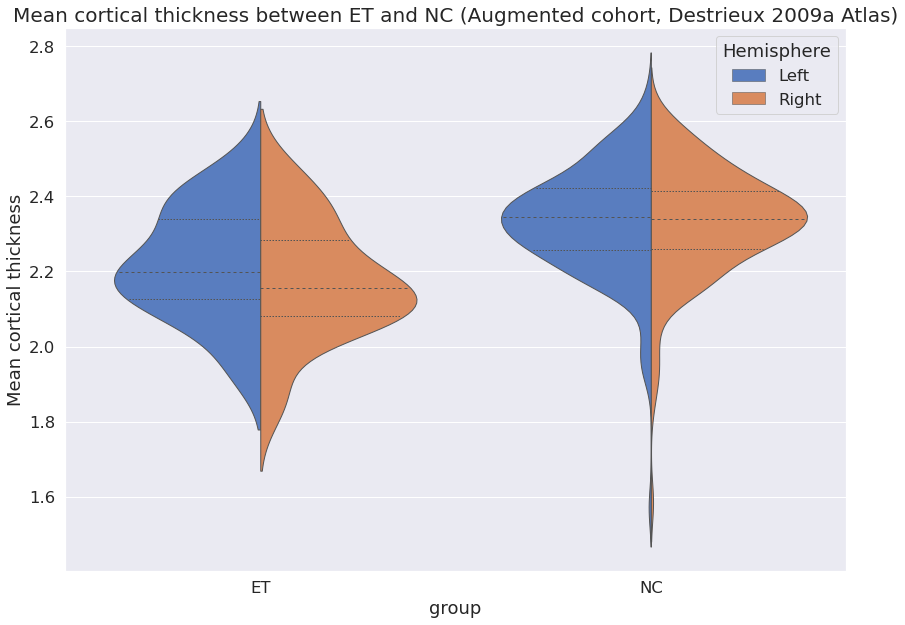

In [5]:
#Mean cortical thickness for left and right hemisphere
lr_mct_vis=data_df.copy()

l_mct=lr_mct_vis[['group','cohort','lh_MeanThickness_thickness']].copy(); 
l_mct.loc[:,'Hemisphere']='Left'; 
l_mct.loc[:,'Mean cortical thickness']=l_mct.loc[:,'lh_MeanThickness_thickness'];
#l_mct=l_mct.drop(columns=['left_mean_cortical_thickness'])

r_mct=lr_mct_vis[['group','cohort','rh_MeanThickness_thickness']].copy(); 
r_mct.loc[:,'Hemisphere']='Right'; 
r_mct.loc[:,'Mean cortical thickness']=r_mct.loc[:,'rh_MeanThickness_thickness'];
#r_mct=r_mct.drop(columns=['rh_MeanThickness_thickness'])

vis_df=pd.concat([r_mct, l_mct])
vis_df=vis_df.sort_values(by=['Hemisphere'], ascending=1)

vis_mni_df=vis_df.copy()
vis_mni_df=vis_mni_df[vis_mni_df['cohort']=='MNI'];
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots(figsize=(14, 10))
sns.violinplot(data=vis_df, x="group", y="Mean cortical thickness", hue="Hemisphere", order=['ET','NC'],split=True, inner="quartile", linewidth=1, palette="muted", ax=ax)
#sns.despine(left=True)
ax.set_title('Mean cortical thickness between ET and NC (Augmented cohort, Destrieux 2009a Atlas)', fontsize=20)
#fig.savefig("AugCohort_SUIT-MAGeT_comp.jpg")